# Titanic Machine Learning from Disaster: Classification model investigation

Objectives
- Fit Logistic Regression model  to Titanic – Machine Learning from Disaster Kaggle competition data  and measure accuracy. 
- Compare performance of different classifier, not focussed on optimising for accuracy due to time limits
Reference Will Cukierski. Titanic - Machine Learning from Disaster. https://kaggle.com/competitions/titanic, 2012. Kaggle.

Dataset Variable Definitions
- survival	Survival	0 = No, 1 = Yes
- pclass	Ticket class	1 = 1st Upper, 2 = 2nd Middle, 3 = 3rd Lower -  A proxy for socio-economic status (SES)
- sex	Sex	
- Age	Age in years
    - Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
- sibsp	# of siblings / spouses aboard the Titanic	
    - Sibling = brother, sister, stepbrother, stepsister
    - Spouse = husband, wife (mistresses and fiancés were ignored)
- parch	# of parents / children aboard the Titanic
    - Parent = mother, father
    - Child = daughter, son, stepdaughter, stepson
    - Some children travelled only with a nanny, therefore parch=0 for them.
- ticket	Ticket number	
- fare	Passenger fare	
- cabin	Cabin number	
- embarked	Port of Embarkation	C = Cherbourg (France, 2nd port), Q = Queenstown (now Cobh,Ireland - 3rd port), S = Southampton (England, origin port)



# 1. Import Libraries

In [551]:
# review at end and delete not needed

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics, svm
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

# 2. Exploratory data analysis
# 2.1  Initial exploration

In [552]:
# load data
training_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")


In [553]:
# view data
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [554]:
# view data
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [555]:
# describe dataset statistics
training_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [556]:
# describe dataset statistics
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


- PassengerId all unique values - not useful for categorisation
- P class looks to only have 1-3 as expected 
- SibSp and Parch look sensible at first glance with min of 0 and max of 8 or 9 respectively
- Don't expect Fare data to have a 0 value - investigate this in section 2.5




In [557]:
# information on dataset
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [558]:
# check for duplicate rows
duplic_check = training_data.drop_duplicates()
duplic_check.info()
# same row number as main data set - no duplicates 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [559]:
# information on dataset
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [560]:
# check for duplicate rows
duplic_check = test_data.drop_duplicates()
duplic_check.info()
# same row number as main data set - no duplicates 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


Assessing null values across both test and training set
- a lot of null data in Age, approx 20% 
- one null in Fare in test data set only. Will review as part of section 2.5
- very minimal data on cabin, limited information to impute a value - will not use
- a couple of null data in Embarked in training data set only
- cabin mostly null data both datasets


Look at Ticket and cabin information:
- a lot of unique non numeric values - will not use


In [561]:
# Review content of tickets
training_data["Ticket"].value_counts()

Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
STON/O2. 3101282    1
Name: count, Length: 681, dtype: int64

In [562]:
# Review content of tickets
test_data["Ticket"].value_counts()

Ticket
PC 17608              5
CA. 2343              4
113503                4
347077                3
SOTON/O.Q. 3101315    3
                     ..
330972                1
7538                  1
3101298               1
315154                1
240276                1
Name: count, Length: 363, dtype: int64

In [563]:
# Review content of cabin
training_data["Cabin"].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

In [564]:
# Review content of cabin
test_data["Cabin"].value_counts()

Cabin
B57 B59 B63 B66    3
B45                2
C23 C25 C27        2
C78                2
C31                2
                  ..
B41                1
C7                 1
D40                1
D38                1
C105               1
Name: count, Length: 76, dtype: int64


# 2.2 Filling null and Data transformation of catergorical variables
Assessing object/string data types across both test and training set
- Name - unique value all - could be used indirectly via decomposition, refer to section 2.x Creating Adult_Child feature
- Sex convert with onelabel encoder to binary
- Some shared but a lot of unique values in ticket and cabin - each test set likely to introduce new variables with onelabel encoder (will not use)
- Embarked convert with onelabel encoder to 3 numbers representing Port of Embarkation	C = Cherbourg (France, 2nd port), Q = Queenstown (now Cobh, Ireland, 3rd port), S = Southampton (England, origin). 
    - a couple of null data in Embarked in training data set only (would make 4 categories if encode before removing null)

In [565]:
# Embarked counts
training_data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [566]:
# Embarked counts
test_data["Embarked"].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [567]:
# Labelencode define
label_enc = LabelEncoder()

# Apply label encoder training
training_data["Sex_num"]= label_enc.fit_transform(training_data["Sex"]) # male = 1, # female = 0

# Get rid of nulls to not create a 4th category, use S as most frequent
training_data["Embarked"] = training_data["Embarked"].fillna("S")
# Apply label encoder
training_data["Embarked_num"]= label_enc.fit_transform(training_data["Embarked"]) #  C = 0, Q = 1, S = 2

# show data
training_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num,Embarked_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,0


In [568]:
training_data["Sex_num"].value_counts()

Sex_num
1    577
0    314
Name: count, dtype: int64

In [569]:
training_data["Embarked"].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [570]:
training_data["Embarked_num"].value_counts()

Embarked_num
2    646
0    168
1     77
Name: count, dtype: int64

In [571]:
# Apply label encoder test
test_data["Sex_num"]= label_enc.fit_transform(test_data["Sex"]) # male = 1, # female = 0

# Get rid of nulls to not create a 4th category, use S as most frequent
test_data["Embarked"] = test_data["Embarked"].fillna("S")
# Apply label encoder
test_data["Embarked_num"]= label_enc.fit_transform(test_data["Embarked"]) # C = 0, Q = 1, S = 2

# show data
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num,Embarked_num
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1,2
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,2
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1,2


In [572]:
test_data["Sex_num"].value_counts()

Sex_num
1    266
0    152
Name: count, dtype: int64

In [573]:
test_data["Embarked"].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [574]:
test_data["Embarked_num"].value_counts()

Embarked_num
2    270
0    102
1     46
Name: count, dtype: int64

Blue is training data and red is test data


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

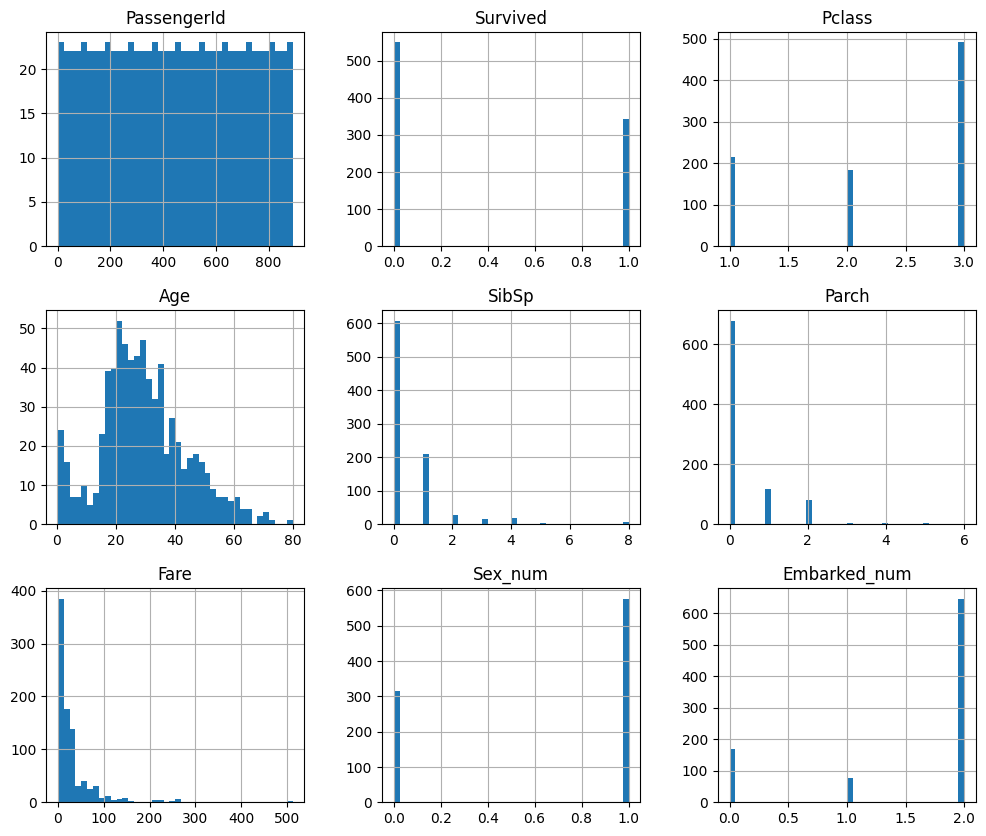

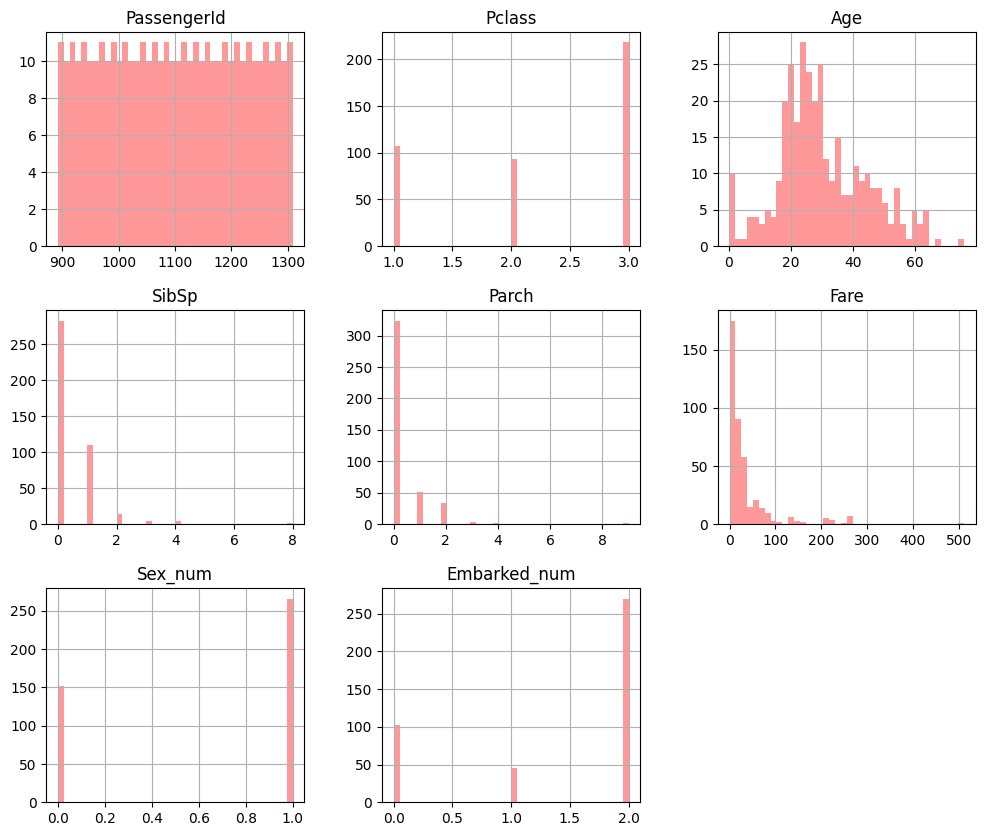

In [575]:
# Visualise distibution of features
# histogram all numeric data to check data skews at a glance
print("Blue is training data and red is test data")

training_data.hist(bins=40, figsize=(12,10))
plt.tight_layout
test_data.hist(bins=40, figsize=(12,10),color = (1,0.5,0.5,0.8))
plt.tight_layout

Both test and training set show comparable distribution for all categories

In [576]:
# stats data after encoding
training_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_num,Embarked_num
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,1.536476
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990,0.791503
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,1.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,2.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,2.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,2.000000


In [577]:
# stats data after encoding
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_num,Embarked_num
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,0.636364,1.401914
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,0.481622,0.854496
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000,1.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,1.000000,2.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,1.000000,2.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000,2.000000



- a lot of null data in Age, approx 20% 
- one null in Fare in test data set only but questionable 0 values - await filling until examine Fare data in section 2.5


In [578]:
# Filling null values
# replace with mean (not a lot of outliers) or median (lots of outliers)
# Making neew column for Age so can play with alternate fills if required

training_data["Age_fill_med"] = training_data["Age"].fillna(training_data["Age"].median())


training_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           714 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         204 non-null    object 
 11  Embarked      891 non-null    object 
 12  Sex_num       891 non-null    int64  
 13  Embarked_num  891 non-null    int64  
 14  Age_fill_med  891 non-null    float64
dtypes: float64(3), int64(7), object(5)
memory usage: 104.5+ KB


In [579]:
# stats data after filling nulls
training_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_num,Embarked_num,Age_fill_med
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,1.536476,29.361582
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990,0.791503,13.019697
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.420000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,1.000000,22.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,2.000000,28.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,2.000000,35.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,2.000000,80.000000


In [580]:
# Filling null values
# replace with mean (not a lot of outliers) or median (lots of outliers)
# Making neew column for Age so can play wiht alternate fills if required

test_data["Age_fill_med"] = test_data["Age"].fillna(test_data["Age"].median())

test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   418 non-null    int64  
 1   Pclass        418 non-null    int64  
 2   Name          418 non-null    object 
 3   Sex           418 non-null    object 
 4   Age           332 non-null    float64
 5   SibSp         418 non-null    int64  
 6   Parch         418 non-null    int64  
 7   Ticket        418 non-null    object 
 8   Fare          417 non-null    float64
 9   Cabin         91 non-null     object 
 10  Embarked      418 non-null    object 
 11  Sex_num       418 non-null    int64  
 12  Embarked_num  418 non-null    int64  
 13  Age_fill_med  418 non-null    float64
dtypes: float64(3), int64(6), object(5)
memory usage: 45.8+ KB


In [581]:
# stats data after filling nulls
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_num,Embarked_num,Age_fill_med
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,0.636364,1.401914,29.599282
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,0.481622,0.854496,12.703770
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.170000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000,1.000000,23.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,1.000000,2.000000,27.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,1.000000,2.000000,35.750000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000,2.000000,76.000000


# 2.3 Investigating age null values


In [582]:
# decomposing Surname into seperate column
training_data['Surname'] =training_data['Name'].str.split('.', expand=True)[0]
test_data['Surname'] =test_data['Name'].str.split('.', expand=True)[0]
training_data

# decomposing Hons (honorifics) into seperate column
training_data["Hons"] =training_data['Surname'].str.split(',', expand=True)[1]
test_data["Hons"] =test_data['Surname'].str.split(',', expand=True)[1]
training_data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num,Embarked_num,Age_fill_med,Surname,Hons
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2,22.0,"Braund, Mr",Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,38.0,"Cumings, Mrs",Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2,26.0,"Heikkinen, Miss",Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2,35.0,"Futrelle, Mrs",Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,2,35.0,"Allen, Mr",Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,2,27.0,"Montvila, Rev",Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,2,19.0,"Graham, Miss",Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,2,28.0,"Johnston, Miss",Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,0,26.0,"Behr, Mr",Mr


In [ ]:
# review ages
age_count = training_data["Age"].value_counts()
# Convert to DataFrame 
agetable = pd.DataFrame(age_count)

# Display the result ordered 
# first 17 values shown so can compare data to given in pivot table in next cell (should be 64 from 0.01-10, inclusive)
agetable.sort_values('Age').head(17)

,count
Age,
0.42,1
0.67,1
0.75,2
0.83,2
0.92,1
1.00,7
2.00,10
3.00,6
4.00,10


In [584]:
# pivot table of honorifics
# understanding string data (pivot table)

training_data['agebin'] = pd.cut(training_data["Age"], [0,10,11,13,14,18,21,25,30,40,80])

pvtdf =training_data.pivot_table(index='Hons', columns=['agebin'], values=["Age"], aggfunc=('count'),observed=False).fillna(0)

pvtdf.T

Hons          Capt  Col  Don  Dr  Jonkheer  Lady  Major  Master  Miss  Mlle  \
    agebin                                                                    
Age (0, 10]      0    0    0   0         0     0      0      33    31     0   
    (10, 11]     0    0    0   0         0     0      0       2     1     0   
    (11, 13]     0    0    0   0         0     0      0       1     2     0   
    (13, 14]     0    0    0   0         0     0      0       0     3     0   
    (14, 18]     0    0    0   0         0     0      0       0    24     0   
    (18, 21]     0    0    0   0         0     0      0       0    14     0   
    (21, 25]     0    0    0   1         0     0      0       0    22     2   
    (25, 30]     0    0    0   0         0     0      0       0    18     0   
    (30, 40]     0    0    1   1         1     0      0       0    21     0   
    (40, 80]     1    2    0   4         0     1      2       0    10     0   

Hons          Mme  Mr  Mrs  Ms  Rev  Sir  the Countess  
    agebin                                              
Age (0, 10]     0   0    0   0    0    0             0  
    (10, 11]    0   1    0   0    0    0             0  
    (11, 13]    0   0    0   0    0    0             0  
    (13, 14]    0   2    1   0    0    0             0  
    (14, 18]    0  32    6   0    0    0             0  
    (18, 21]    0  49    2   0    0    0             0  
    (21, 25]    1  58   13   0    0    0             0  
    (25, 30]    0  70   17   1    2    0             0  
    (30, 40]    0  97   33   0    0    0             1  
    (40, 80]    0  89   36   0    4    1             0

Bin notation:   ( = not including the first number, ] = including the last number

- changes master to mister after 13 except 1 mr at 11 in training set 
- Miss across all ages

In [585]:
training_data["Surname"].value_counts()

Surname
Andersson, Miss    5
Gustafsson, Mr     4
Rice, Master       4
Williams, Mr       4
Jensen, Mr         3
                  ..
Markun, Mr         1
Shelley, Mrs       1
Potter, Mrs        1
Laleff, Mr         1
Najib, Miss        1
Name: count, Length: 803, dtype: int64

In [586]:
training_data["Hons"].value_counts()

Hons
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

In [587]:
test_data["Hons"].value_counts()

Hons
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [588]:
# understanding string data (pivot table)
# pivot table of honorifics

test_data['agebin'] = pd.cut(test_data["Age"], [0,10,11,13,14,18,21,25,30,40,80])

pvtdf =test_data.pivot_table(index='Hons', columns=['agebin'], values=["Age"], aggfunc=('count'),observed=False).fillna(0)

pvtdf.T


Hons          Col  Dona  Dr  Master  Miss  Mr  Mrs  Ms  Rev
    agebin                                                 
Age (0, 10]     0     0   0      12    10   0    0   0    0
    (10, 11]    0     0   0       0     0   0    0   0    0
    (11, 13]    0     0   0       4     2   0    0   0    0
    (13, 14]    0     0   0       0     0   2    0   0    0
    (14, 18]    0     0   0       1     8  11    4   0    0
    (18, 21]    0     0   0       0     9  21    2   0    0
    (21, 25]    0     0   0       0    12  35    9   0    0
    (25, 30]    0     0   0       0    11  36   10   0    1
    (30, 40]    0     1   0       0    11  35    8   0    0
    (40, 80]    2     0   1       0     1  43   29   0    1

- changes master to mister after 13 except 1 mr at 11 in training set and 1 master between 15-18 in test set
- Miss across all ages

Parch review shows younger ages typically have at least 1 Parch (exception where child is with unrelated nanny, will show as 0)

In [589]:
# review parch for youngest ages
training_data.sort_values('Age',ascending=True).head(60)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num,Embarked_num,Age_fill_med,Surname,Hons,agebin
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C,1,0,0.42,"Thomas, Master",Master,"(0, 10]"
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S,1,2,0.67,"Hamalainen, Master",Master,"(0, 10]"
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C,0,0,0.75,"Baclini, Miss",Miss,"(0, 10]"
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C,0,0,0.75,"Baclini, Miss",Miss,"(0, 10]"
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S,1,2,0.83,"Caldwell, Master",Master,"(0, 10]"
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S,1,2,0.83,"Richards, Master",Master,"(0, 10]"
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,1,2,0.92,"Allison, Master",Master,"(0, 10]"
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.00,5,2,CA 2144,46.9000,NaN,S,1,2,1.00,"Goodwin, Master",Master,"(0, 10]"
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.1333,NaN,S,0,2,1.00,"Johnson, Miss",Miss,"(0, 10]"
183,184,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,F4,S,1,2,1.00,"Becker, Master",Master,"(0, 10]"


In [590]:
# Create a table of null data to review

# drop cabin as had lots of nulls and not using = otherwise too many rows in null table
train_dropcabin = training_data.drop("Cabin",axis = 1)


# Filter rows with any NaN values

training_with_nulls = train_dropcabin[train_dropcabin.isnull().any(axis=1)]
#view results sorted by Parch
training_with_nulls.sort_values('Parch',ascending=False).head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_num,Embarked_num,Age_fill_med,Surname,Hons,agebin
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,S,1,2,28.0,"Sage, Master",Master,NaN
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,S,0,2,28.0,"Sage, Miss",Miss,NaN
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.5500,S,1,2,28.0,"Sage, Mr",Mr,NaN
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,C,0,0,28.0,"Boulos, Mrs",Mrs,NaN
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,S,1,2,28.0,"Sage, Mr",Mr,NaN
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.5500,S,0,2,28.0,"Sage, Miss",Miss,NaN
783,784,0,3,"Johnston, Mr. Andrew G",male,NaN,1,2,W./C. 6607,23.4500,S,1,2,28.0,"Johnston, Mr",Mr,NaN
533,534,1,3,"Peter, Mrs. Catherine (Catherine Rizk)",female,NaN,0,2,2668,22.3583,C,0,0,28.0,"Peter, Mrs",Mrs,NaN
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.5500,S,1,2,28.0,"Sage, Mr",Mr,NaN
593,594,0,3,"Bourke, Miss. Mary",female,NaN,0,2,364848,7.7500,Q,0,1,28.0,"Bourke, Miss",Miss,NaN


# 2.4 Creating Adult_Child feature
- Miss and Master only Hons in data of younger ages and typically had at least one parent/child - used this to attempt to assign null ages to a category
- From pivot table Master changed to Mister at about 14 - use this to mark adulthood
- This won't work for child, unknown age with nanny or adult woman named Miss unknown age with their parent (minimal cases) or where data is entered as 0 incorrectly. Could seperate into elderly but was women and children first.
* named as child female, child male, female adult, male adult so would encode alphabetically as 0-3

In [591]:
# create new Child_Adult column
training_data.loc[(training_data["Hons"] == " Miss") & (pd.isnull(training_data["Age"])) & (training_data["Parch"]>0) & (training_data["Sex"] == "female") , 'Child_Adult'] = "child female"
training_data.loc[(training_data["Hons"] == " Master") & (pd.isnull(training_data["Age"])) & (training_data["Parch"]>0) & (training_data["Sex"] == "male"), 'Child_Adult'] = "child male"
training_data.loc[(training_data["Hons"] != " Miss") & (pd.isnull(training_data["Age"])) & (training_data["Parch"]>0) & (training_data["Sex"] == "female"), 'Child_Adult'] = "female adult"
training_data.loc[(training_data["Hons"] != " Master") & (pd.isnull(training_data["Age"])) & (training_data["Parch"]>0) & (training_data["Sex"] == "male"), 'Child_Adult'] = "male adult"
training_data.loc[(pd.isnull(training_data["Age"])) & (training_data["Parch"]==0) & (training_data["Sex"] == "female"), 'Child_Adult'] = "female adult"
training_data.loc[(pd.isnull(training_data["Age"])) & (training_data["Parch"]==0) & (training_data["Sex"] == "male"), 'Child_Adult'] = "male adult"
training_data.loc[(training_data["Age"] <14) &  (training_data["Sex"] == "female"), 'Child_Adult'] = "child female"
training_data.loc[(training_data["Age"] >=14) &  (training_data["Sex"] == "female"), 'Child_Adult'] = "female adult"
training_data.loc[(training_data["Age"] <14) &  (training_data["Sex"] == "male"), 'Child_Adult'] = "child male"
training_data.loc[(training_data["Age"] >=14) &  (training_data["Sex"] == "male"), 'Child_Adult'] = "male adult"
# check new column
training_data.sort_values('Parch',ascending=True).head(15)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num,Embarked_num,Age_fill_med,Surname,Hons,agebin,Child_Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2,26.0,"Heikkinen, Miss",Miss,"(25.0, 30.0]",female adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2,35.0,"Futrelle, Mrs",Mrs,"(30.0, 40.0]",female adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,2,35.0,"Allen, Mr",Mr,"(30.0, 40.0]",male adult
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,1,28.0,"Moran, Mr",Mr,NaN,male adult
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,2,54.0,"McCarthy, Mr",Mr,"(40.0, 80.0]",male adult
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S,1,2,47.0,"Vander Cruyssen, Mr",Mr,"(40.0, 80.0]",male adult
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C,0,0,28.0,"Abelson, Mrs",Mrs,"(25.0, 30.0]",female adult
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C,0,0,15.0,"Najib, Miss",Miss,"(14.0, 18.0]",female adult
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S,1,2,20.0,"Gustafsson, Mr",Mr,"(18.0, 21.0]",male adult
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S,1,2,19.0,"Petroff, Mr",Mr,"(18.0, 21.0]",male adult


In [592]:
training_data.sort_values('Parch',ascending=False).head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num,Embarked_num,Age_fill_med,Surname,Hons,agebin,Child_Adult
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9000,NaN,S,0,2,43.0,"Goodwin, Mrs",Mrs,"(40, 80]",female adult
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S,0,2,39.0,"Andersson, Mrs",Mrs,"(30, 40]",female adult
638,639,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,3101295,39.6875,NaN,S,0,2,41.0,"Panula, Mrs",Mrs,"(40, 80]",female adult
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,1,2,39.0,"Andersson, Mr",Mr,"(30, 40]",male adult
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,0,1,39.0,"Rice, Mrs",Mrs,"(30, 40]",female adult
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S,0,2,38.0,"Asplund, Mrs",Mrs,"(30, 40]",female adult
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S,0,2,29.0,"Palsson, Mrs",Mrs,"(25, 30]",female adult
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9000,NaN,S,0,2,45.0,"Skoog, Mrs",Mrs,"(40, 80]",female adult
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,1,2,64.0,"Fortune, Mr",Mr,"(40, 80]",male adult
360,361,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.9000,NaN,S,1,2,40.0,"Skoog, Mr",Mr,"(30, 40]",male adult


In [593]:
# Create a table of null data to review with new column

# drop cabin as had lots of nulls and not using = otherwise too many rows in null table
train_dropcabin = training_data.drop("Cabin",axis = 1)


# Filter rows with any NaN values

training_with_nulls = train_dropcabin[train_dropcabin.isnull().any(axis=1)]
# check data
training_with_nulls.sort_values('Parch',ascending=False).head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_num,Embarked_num,Age_fill_med,Surname,Hons,agebin,Child_Adult
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,S,1,2,28.0,"Sage, Master",Master,NaN,child male
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,S,0,2,28.0,"Sage, Miss",Miss,NaN,child female
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.5500,S,1,2,28.0,"Sage, Mr",Mr,NaN,male adult
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,C,0,0,28.0,"Boulos, Mrs",Mrs,NaN,female adult
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,S,1,2,28.0,"Sage, Mr",Mr,NaN,male adult
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.5500,S,0,2,28.0,"Sage, Miss",Miss,NaN,child female
783,784,0,3,"Johnston, Mr. Andrew G",male,NaN,1,2,W./C. 6607,23.4500,S,1,2,28.0,"Johnston, Mr",Mr,NaN,male adult
533,534,1,3,"Peter, Mrs. Catherine (Catherine Rizk)",female,NaN,0,2,2668,22.3583,C,0,0,28.0,"Peter, Mrs",Mrs,NaN,female adult
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.5500,S,1,2,28.0,"Sage, Mr",Mr,NaN,male adult
593,594,0,3,"Bourke, Miss. Mary",female,NaN,0,2,364848,7.7500,Q,0,1,28.0,"Bourke, Miss",Miss,NaN,child female


In [594]:
training_with_nulls.sort_values('Parch',ascending=True).head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_num,Embarked_num,Age_fill_med,Surname,Hons,agebin,Child_Adult
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,1,1,28.0,"Moran, Mr",Mr,NaN,male adult
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S,1,2,28.0,"Williams, Mr",Mr,NaN,male adult
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C,0,0,28.0,"Masselmani, Mrs",Mrs,NaN,female adult
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C,1,0,28.0,"Emir, Mr",Mr,NaN,male adult
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q,0,1,28.0,"O'Dwyer, Miss",Miss,NaN,female adult
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,S,1,2,28.0,"Todoroff, Mr",Mr,NaN,male adult
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,C,0,0,28.0,"Spencer, Mrs",Mrs,NaN,female adult
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,Q,0,1,28.0,"Glynn, Miss",Miss,NaN,female adult
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,C,1,0,28.0,"Mamee, Mr",Mr,NaN,male adult
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,C,1,0,28.0,"Kraeff, Mr",Mr,NaN,male adult


In [595]:
# label encoder - assumes one value is greater than the other

label_enc = LabelEncoder()

training_data["Child_Adult_num"]= label_enc.fit_transform(training_data["Child_Adult"])

training_data["Child_Adult_num"].value_counts()

Child_Adult_num
3    536
2    271
0     43
1     41
Name: count, dtype: int64

Naming such that order would be 0 = female child, 1 = male child, 2 = female adult, 3 = male adult

In [596]:
training_data["Child_Adult"].value_counts()

Child_Adult
male adult      536
female adult    271
child female     43
child male       41
Name: count, dtype: int64

In [597]:
training_with_nulls["Child_Adult"].value_counts()

Child_Adult
male adult      120
female adult     44
child female      9
child male        4
Name: count, dtype: int64

In [598]:
training_data.isnull().sum()

PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                177
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              687
Embarked             0
Sex_num              0
Embarked_num         0
Age_fill_med         0
Surname              0
Hons                 0
agebin             177
Child_Adult          0
Child_Adult_num      0
dtype: int64

In [599]:
# create Child_Adult column in test data
test_data.loc[(test_data["Hons"] == " Miss") & (pd.isnull(test_data["Age"])) & (test_data["Parch"]>0) & (test_data["Sex"] == "female") , 'Child_Adult'] = "child female"
test_data.loc[(test_data["Hons"] == " Master") & (pd.isnull(test_data["Age"])) & (test_data["Parch"]>0) & (test_data["Sex"] == "male"), 'Child_Adult'] = "child male"
test_data.loc[(test_data["Hons"] != " Miss") & (pd.isnull(test_data["Age"])) & (test_data["Parch"]>0) & (test_data["Sex"] == "female"), 'Child_Adult'] = "female adult"
test_data.loc[(test_data["Hons"] != " Master") & (pd.isnull(test_data["Age"])) & (test_data["Parch"]>0) & (test_data["Sex"] == "male"), 'Child_Adult'] = "male adult"
test_data.loc[(pd.isnull(test_data["Age"])) & (test_data["Parch"]==0) & (test_data["Sex"] == "female"), 'Child_Adult'] = "female adult"
test_data.loc[(pd.isnull(test_data["Age"])) & (test_data["Parch"]==0) & (test_data["Sex"] == "male"), 'Child_Adult'] = "male adult"
test_data.loc[(test_data["Age"] <14) &  (test_data["Sex"] == "female"), 'Child_Adult'] = "child female"
test_data.loc[(test_data["Age"] >=14) &  (test_data["Sex"] == "female"), 'Child_Adult'] = "female adult"
test_data.loc[(test_data["Age"] <14) &  (test_data["Sex"] == "male"), 'Child_Adult'] = "child male"
test_data.loc[(test_data["Age"] >=14) &  (test_data["Sex"] == "male"), 'Child_Adult'] = "male adult"
# view
test_data.sort_values('Parch',ascending=True).head(15)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num,Embarked_num,Age_fill_med,Surname,Hons,agebin,Child_Adult
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,1,34.5,"Kelly, Mr",Mr,"(30.0, 40.0]",male adult
401,1293,2,"Gale, Mr. Harry",male,38.0,1,0,28664,21.0000,NaN,S,1,2,38.0,"Gale, Mr",Mr,"(30.0, 40.0]",male adult
213,1105,2,"Howard, Mrs. Benjamin (Ellen Truelove Arman)",female,60.0,1,0,24065,26.0000,NaN,S,0,2,60.0,"Howard, Mrs",Mrs,"(40.0, 80.0]",female adult
403,1295,1,"Carrau, Mr. Jose Pedro",male,17.0,0,0,113059,47.1000,NaN,S,1,2,17.0,"Carrau, Mr",Mr,"(14.0, 18.0]",male adult
404,1296,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C,1,0,43.0,"Frauenthal, Mr",Mr,"(40.0, 80.0]",male adult
405,1297,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C,1,0,20.0,"Nourney, Mr",Mr,"(18.0, 21.0]",male adult
406,1298,2,"Ware, Mr. William Jeffery",male,23.0,1,0,28666,10.5000,NaN,S,1,2,23.0,"Ware, Mr",Mr,"(21.0, 25.0]",male adult
189,1081,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,1,2,40.0,"Veal, Mr",Mr,"(30.0, 40.0]",male adult
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q,0,1,27.0,"Riordan, Miss",Miss,NaN,female adult
190,1082,2,"Angle, Mr. William A",male,34.0,1,0,226875,26.0000,NaN,S,1,2,34.0,"Angle, Mr",Mr,"(30.0, 40.0]",male adult


In [600]:
# label encoder - assumes one value is greater than the other

label_enc = LabelEncoder()

test_data["Child_Adult_num"]= label_enc.fit_transform(test_data["Child_Adult"])

test_data["Child_Adult_num"].value_counts()

Child_Adult_num
3    247
2    139
1     19
0     13
Name: count, dtype: int64

In [601]:
test_data["Child_Adult"].value_counts()

Child_Adult
male adult      247
female adult    139
child male       19
child female     13
Name: count, dtype: int64

In [602]:
test_data.isnull().sum()

PassengerId          0
Pclass               0
Name                 0
Sex                  0
Age                 86
SibSp                0
Parch                0
Ticket               0
Fare                 1
Cabin              327
Embarked             0
Sex_num              0
Embarked_num         0
Age_fill_med         0
Surname              0
Hons                 0
agebin              86
Child_Adult          0
Child_Adult_num      0
dtype: int64

In [603]:
# Make a child and adult age column to get medians
training_data.loc[(training_data["Child_Adult"] == "child female")|(training_data["Child_Adult"] == "child male") , 'Child_Age'] = training_data["Age"]
training_data.loc[(training_data["Child_Adult"] == "female adult")|(training_data["Child_Adult"] == "male adult") , 'Adult_Age'] = training_data["Age"]

training_data.sort_values("Parch").tail(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Sex_num,Embarked_num,Age_fill_med,Surname,Hons,agebin,Child_Adult,Child_Adult_num,Child_Age,Adult_Age
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,...,1,2,0.83,"Caldwell, Master",Master,"(0, 10]",child male,1,0.83,NaN
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.50,0,2,230080,26.0000,...,1,2,36.50,"Navratil, Mr",Mr,"(30, 40]",male adult,3,NaN,36.5
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.00,2,2,W./C. 6608,34.3750,...,0,2,9.00,"Ford, Miss",Miss,"(0, 10]",child female,0,9.00,NaN
59,60,0,3,"Goodwin, Master. William Frederick",male,11.00,5,2,CA 2144,46.9000,...,1,2,11.00,"Goodwin, Master",Master,"(10, 11]",child male,1,11.00,NaN
58,59,1,2,"West, Miss. Constance Mirium",female,5.00,1,2,C.A. 34651,27.7500,...,0,2,5.00,"West, Miss",Miss,"(0, 10]",child female,0,5.00,NaN
86,87,0,3,"Ford, Mr. William Neal",male,16.00,1,3,W./C. 6608,34.3750,...,1,2,16.00,"Ford, Mr",Mr,"(14, 18]",male adult,3,NaN,16.0
858,859,1,3,"Baclini, Mrs. Solomon (Latifa Qurban)",female,24.00,0,3,2666,19.2583,...,0,0,24.00,"Baclini, Mrs",Mrs,"(21, 25]",female adult,2,NaN,24.0
736,737,0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.00,1,3,W./C. 6608,34.3750,...,0,2,48.00,"Ford, Mrs",Mrs,"(40, 80]",female adult,2,NaN,48.0
437,438,1,2,"Richards, Mrs. Sidney (Emily Hocking)",female,24.00,2,3,29106,18.7500,...,0,2,24.00,"Richards, Mrs",Mrs,"(21, 25]",female adult,2,NaN,24.0
774,775,1,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.00,1,3,29105,23.0000,...,0,2,54.00,"Hocking, Mrs",Mrs,"(40, 80]",female adult,2,NaN,54.0


In [604]:
# Make a child and adult age column to get medians for each group
test_data.loc[(test_data["Child_Adult"] == "child female")|(test_data["Child_Adult"] == "child male") , 'Child_Age'] = test_data["Age"]
test_data.loc[(test_data["Child_Adult"] == "female adult")|(test_data["Child_Adult"] == "male adult") , 'Adult_Age'] = test_data["Age"]

test_data.sort_values("Parch").tail(20)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Sex_num,Embarked_num,Age_fill_med,Surname,Hons,agebin,Child_Adult,Child_Adult_num,Child_Age,Adult_Age
262,1154,2,"Wells, Mrs. Arthur Henry (Addie"" Dart Trevaskis)""",female,29.0,0,2,29103,23.0000,NaN,...,0,2,29.0,"Wells, Mrs",Mrs,"(25.0, 30.0]",female adult,2,NaN,29.0
49,941,3,"Coutts, Mrs. William (Winnie Minnie"" Treanor)""",female,36.0,0,2,C.A. 37671,15.9000,NaN,...,0,2,36.0,"Coutts, Mrs",Mrs,"(30.0, 40.0]",female adult,2,NaN,36.0
360,1252,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.5500,NaN,...,1,2,14.5,"Sage, Master",Master,"(14.0, 18.0]",male adult,3,NaN,14.5
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,...,0,2,27.0,"Johnston, Mrs",Mrs,NaN,female adult,2,NaN,NaN
32,924,3,"Dean, Mrs. Bertram (Eva Georgetta Light)",female,33.0,1,2,C.A. 2315,20.5750,NaN,...,0,2,33.0,"Dean, Mrs",Mrs,"(30.0, 40.0]",female adult,2,NaN,33.0
194,1086,2,"Drew, Master. Marshall Brines",male,8.0,0,2,28220,32.5000,NaN,...,1,2,8.0,"Drew, Master",Master,"(0.0, 10.0]",child male,1,8.0,NaN
296,1188,2,"Laroche, Miss. Louise",female,1.0,1,2,SC/Paris 2123,41.5792,NaN,...,0,0,1.0,"Laroche, Miss",Miss,"(0.0, 10.0]",child female,0,1.0,NaN
188,1080,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.5500,NaN,...,0,2,27.0,"Sage, Miss",Miss,NaN,child female,0,NaN,NaN
214,1106,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.7750,NaN,...,0,2,38.0,"Andersson, Miss",Miss,"(30.0, 40.0]",female adult,2,NaN,38.0
330,1222,2,"Davies, Mrs. John Morgan (Elizabeth Agnes Mary...",female,48.0,0,2,C.A. 33112,36.7500,NaN,...,0,2,48.0,"Davies, Mrs",Mrs,"(40.0, 80.0]",female adult,2,NaN,48.0


In [605]:
# describe for stats
training_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_num,Embarked_num,Age_fill_med,Child_Adult_num,Child_Age,Adult_Age
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,71.000000,643.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,1.536476,29.361582,2.459035,5.002394,32.426128
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990,0.791503,13.019697,0.794118,3.612032,12.571090
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.420000,0.000000,0.420000,14.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,1.000000,22.000000,2.000000,2.000000,23.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,2.000000,28.000000,3.000000,4.000000,30.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,2.000000,35.000000,3.000000,8.000000,40.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,2.000000,80.000000,3.000000,13.000000,80.000000


In [606]:
# describe for stats
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_num,Embarked_num,Age_fill_med,Child_Adult_num,Child_Age,Adult_Age
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000,418.000000,418.000000,418.000000,28.000000,304.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,0.636364,1.401914,29.599282,2.483254,6.125000,32.496711
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,0.481622,0.854496,12.703770,0.726977,4.598905,12.607884
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.170000,0.000000,0.170000,14.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000,1.000000,23.000000,2.000000,1.000000,23.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,1.000000,2.000000,27.000000,3.000000,6.000000,29.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,1.000000,2.000000,35.750000,3.000000,10.000000,40.625000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000,2.000000,76.000000,3.000000,13.000000,76.000000


In [607]:
# Alternate fillnull approach
training_data.loc[(pd.isnull(training_data["Age"]))&(training_data["Child_Adult"] == "child female")|(training_data["Child_Adult"] == "child male") , 'Age_fill_alt'] = training_data["Child_Age"].median()
training_data.loc[(pd.isnull(training_data["Age"]))&(training_data["Child_Adult"] == "female adult")|(training_data["Child_Adult"] == "male adult") , 'Age_fill_alt'] = training_data["Adult_Age"].median()
training_data.loc[ (pd.notnull(training_data["Age"])), 'Age_fill_alt'] = training_data["Age"]

training_data.sort_values("Parch").tail(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked_num,Age_fill_med,Surname,Hons,agebin,Child_Adult,Child_Adult_num,Child_Age,Adult_Age,Age_fill_alt
165,166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.00,0,2,363291,20.5250,...,2,9.00,"Goldsmith, Master",Master,"(0.0, 10.0]",child male,1,9.00,NaN,9.00
237,238,1,2,"Collyer, Miss. Marjorie ""Lottie""",female,8.00,0,2,C.A. 31921,26.2500,...,2,8.00,"Collyer, Miss",Miss,"(0.0, 10.0]",child female,0,8.00,NaN,8.00
233,234,1,3,"Asplund, Miss. Lillian Gertrud",female,5.00,4,2,347077,31.3875,...,2,5.00,"Asplund, Miss",Miss,"(0.0, 10.0]",child female,0,5.00,NaN,5.00
254,255,0,3,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",female,41.00,0,2,370129,20.2125,...,2,41.00,"Rosblom, Mrs",Mrs,"(40.0, 80.0]",female adult,2,NaN,41.0,41.00
255,256,1,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",female,29.00,0,2,2650,15.2458,...,0,29.00,"Touma, Mrs",Mrs,"(25.0, 30.0]",female adult,2,NaN,29.0,29.00
788,789,1,3,"Dean, Master. Bertram Vere",male,1.00,1,2,C.A. 2315,20.5750,...,2,1.00,"Dean, Master",Master,"(0.0, 10.0]",child male,1,1.00,NaN,1.00
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.00,4,2,347082,31.2750,...,2,6.00,"Andersson, Miss",Miss,"(0.0, 10.0]",child female,0,6.00,NaN,6.00
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.5500,...,2,28.00,"Sage, Mr",Mr,NaN,male adult,3,NaN,NaN,30.00
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.5500,...,2,28.00,"Sage, Miss",Miss,NaN,child female,0,NaN,NaN,4.00
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.00,4,2,347082,31.2750,...,2,4.00,"Andersson, Master",Master,"(0.0, 10.0]",child male,1,4.00,NaN,4.00


In [608]:
# Alternate fillnull approach
test_data.loc[(pd.isnull(test_data["Age"]))&(test_data["Child_Adult"] == "child female")|(test_data["Child_Adult"] == "child male") , 'Age_fill_alt'] = test_data["Child_Age"].median()
test_data.loc[(pd.isnull(test_data["Age"]))&(test_data["Child_Adult"] == "female adult")|(test_data["Child_Adult"] == "male adult") , 'Age_fill_alt'] = test_data["Adult_Age"].median()
test_data.loc[ (pd.notnull(test_data["Age"])), 'Age_fill_alt'] = test_data["Age"]

test_data.sort_values("Parch").tail(15)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Embarked_num,Age_fill_med,Surname,Hons,agebin,Child_Adult,Child_Adult_num,Child_Age,Adult_Age,Age_fill_alt
194,1086,2,"Drew, Master. Marshall Brines",male,8.0,0,2,28220,32.5000,NaN,...,2,8.0,"Drew, Master",Master,"(0.0, 10.0]",child male,1,8.0,NaN,8.0
296,1188,2,"Laroche, Miss. Louise",female,1.0,1,2,SC/Paris 2123,41.5792,NaN,...,0,1.0,"Laroche, Miss",Miss,"(0.0, 10.0]",child female,0,1.0,NaN,1.0
188,1080,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.5500,NaN,...,2,27.0,"Sage, Miss",Miss,NaN,child female,0,NaN,NaN,6.0
214,1106,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.7750,NaN,...,2,38.0,"Andersson, Miss",Miss,"(30.0, 40.0]",female adult,2,NaN,38.0,38.0
330,1222,2,"Davies, Mrs. John Morgan (Elizabeth Agnes Mary...",female,48.0,0,2,C.A. 33112,36.7500,NaN,...,2,48.0,"Davies, Mrs",Mrs,"(40.0, 80.0]",female adult,2,NaN,48.0,48.0
179,1071,1,"Compton, Mrs. Alexander Taylor (Mary Eliza Ing...",female,64.0,0,2,PC 17756,83.1583,E45,...,0,64.0,"Compton, Mrs",Mrs,"(40.0, 80.0]",female adult,2,NaN,64.0,64.0
142,1034,1,"Ryerson, Mr. Arthur Larned",male,61.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,...,0,61.0,"Ryerson, Mr",Mr,"(40.0, 80.0]",male adult,3,NaN,61.0,61.0
178,1070,2,"Becker, Mrs. Allen Oliver (Nellie E Baumgardner)",female,36.0,0,3,230136,39.0000,F4,...,2,36.0,"Becker, Mrs",Mrs,"(30.0, 40.0]",female adult,2,NaN,36.0,36.0
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,...,0,48.0,"Ryerson, Mrs",Mrs,"(40.0, 80.0]",female adult,2,NaN,48.0,48.0
132,1024,3,"Lefebre, Mrs. Frank (Frances)",female,NaN,0,4,4133,25.4667,NaN,...,2,27.0,"Lefebre, Mrs",Mrs,NaN,female adult,2,NaN,NaN,29.0


In [609]:
# check null values
training_data.isnull().sum()

PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                177
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              687
Embarked             0
Sex_num              0
Embarked_num         0
Age_fill_med         0
Surname              0
Hons                 0
agebin             177
Child_Adult          0
Child_Adult_num      0
Child_Age          820
Adult_Age          248
Age_fill_alt         0
dtype: int64

In [610]:
# check null values
test_data.isnull().sum()

PassengerId          0
Pclass               0
Name                 0
Sex                  0
Age                 86
SibSp                0
Parch                0
Ticket               0
Fare                 1
Cabin              327
Embarked             0
Sex_num              0
Embarked_num         0
Age_fill_med         0
Surname              0
Hons                 0
agebin              86
Child_Adult          0
Child_Adult_num      0
Child_Age          390
Adult_Age          114
Age_fill_alt         0
dtype: int64

# 2.5 Investigating Fare data

In [611]:
fare_count = training_data["Fare"].value_counts()
# Convert to DataFrame 
faretable = pd.DataFrame(fare_count)

# Display the result ordered by date
faretable.sort_values('Fare').head(25)

,count
Fare,
0.0000,15
4.0125,1
5.0000,1
6.2375,1
6.4375,1
6.4500,1
6.4958,2
6.7500,2
6.8583,1


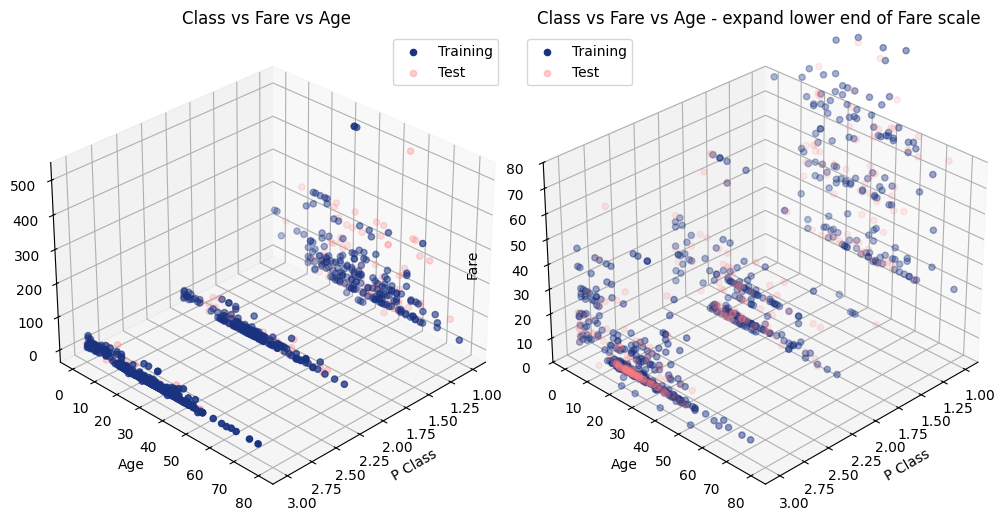

In [612]:

# 3D plot
# Plot Fare vs Class vs Age
fig = plt.figure(figsize=(10,30))
ax = fig.add_subplot(2,2,1, projection = "3d")
ax2 = fig.add_subplot(2,2,2, projection = "3d")


ax.scatter(training_data["Pclass"],training_data["Age"],training_data["Fare"],color = (0.1,0.2,0.5,1))
ax.scatter(test_data["Pclass"],test_data["Age"],test_data["Fare"],color = (1,0.5,0.5,0.4))
ax.view_init(elev = 30, azim =45, roll = 0)
ax.set_title("Class vs Fare vs Age")
ax.set_xlabel("P Class")
ax.set_ylabel("Age")
ax.zaxis.set_rotate_label(False) # disable automatic rotation
ax.set_zlabel("Fare",rotation=90, labelpad=10)
ax.legend(('Training', 'Test'))

ax2.scatter(training_data["Pclass"],training_data["Age"],training_data["Fare"],color = (0.1,0.2,0.5,1))
ax2.scatter(test_data["Pclass"],test_data["Age"],test_data["Fare"],color = (1,0.5,0.5,0.4))
ax2.view_init(elev = 30, azim =45, roll = 0)
ax2.set_title("Class vs Fare vs Age - expand lower end of Fare scale")
ax2.set_xlabel("P Class")
ax2.set_ylabel("Age")
ax2.set_zlim(0,80)
ax2.zaxis.set_rotate_label(False) # disable automatic rotation
ax2.set_zlabel("Fare",rotation=90, labelpad=10)
ax2.legend(('Training', 'Test'))

plt.tight_layout()

In [613]:
# pivot table to review fares based on age using child_adult categorical
training_data['farebin'] = pd.cut(training_data["Fare"], [-0.01,0,10,20,30,40,50,60,70,80,90,100,200,300,515])

pvtdf =training_data.pivot_table(index=['Pclass',"Child_Adult"], columns=['farebin'], values=["Fare"], aggfunc=('count')).fillna(0)

pvtdf

C:\Users\USER-1\AppData\Local\Temp\ipykernel_5832\875504598.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvtdf =training_data.pivot_table(index=['Pclass',"Child_Adult"], columns=['farebin'], values=["Fare"], aggfunc=('count')).fillna(0)


Fare                                        \
farebin             (-0.01, 0.0] (0.0, 10.0] (10.0, 20.0] (20.0, 30.0]   
Pclass Child_Adult                                                       
1      child female            0           0            0            0   
       child male              0           0            0            0   
       female adult            0           0            0            7   
       male adult              5           1            0           34   
2      child female            0           0            1            5   
       child male              0           0            3            3   
       female adult            0           0           34           26   
       male adult              6           0           60           22   
3      child female            0           2           11           11   
       child male              0           1            8           10   
       female adult            0          62           32           10   
       male adult              4         255           30           14   

                                                                         \
farebin             (30.0, 40.0] (40.0, 50.0] (50.0, 60.0] (60.0, 70.0]   
Pclass Child_Adult                                                        
1      child female            0            0            0            0   
       child male              0            0            0            0   
       female adult            3            2           15            3   
       male adult             20            5           16            5   
2      child female            2            1            0            0   
       child male              3            0            0            0   
       female adult            4            1            0            2   
       male adult              5            1            0            0   
3      child female            6            0            0            3   
       child male              6            3            0            1   
       female adult            5            2            0            0   
       male adult              4            1            7            3   

                                                                            \
farebin             (70.0, 80.0] (80.0, 90.0] (90.0, 100.0] (100.0, 200.0]   
Pclass Child_Adult                                                           
1      child female            0            0             0              1   
       child male              0            1             0              2   
       female adult           16           11             3             21   
       male adult             10            5             1              9   
2      child female            0            0             0              0   
       child male              0            0             0              0   
       female adult            0            0             0              0   
       male adult              5            0             0              0   
3      child female            0            0             0              0   
       child male              0            0             0              0   
       female adult            0            0             0              0   
       male adult              0            0             0              0   

                                                   
farebin             (200.0, 300.0] (300.0, 515.0]  
Pclass Child_Adult                                 
1      child female              0              0  
       child male                0              0  
       female adult             11              1  
       male adult                6              2  
2      child female              0              0  
       child male                0              0  
       female adult              0              0  
       male adult                0              0  
3      child female              0              

In [614]:
# pivot table to review fares based on age using child_adult categorical
test_data['farebin'] = pd.cut(test_data["Fare"], [-0.01,0,10,20,30,40,50,60,70,80,90,100,200,300,515])

pvtdf =test_data.pivot_table(index=['Pclass',"Child_Adult"], columns=['farebin'], values=["Fare"], aggfunc=('count')).fillna(0)

pvtdf

C:\Users\USER-1\AppData\Local\Temp\ipykernel_5832\567176892.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvtdf =test_data.pivot_table(index=['Pclass',"Child_Adult"], columns=['farebin'], values=["Fare"], aggfunc=('count')).fillna(0)


Fare                                        \
farebin             (-0.01, 0.0] (0.0, 10.0] (10.0, 20.0] (20.0, 30.0]   
Pclass Child_Adult                                                       
1      child female            0           0            0            0   
       child male              0           0            0            0   
       female adult            0           0            0            7   
       male adult              2           0            0           18   
2      child female            0           0            1            2   
       child male              0           0            0            1   
       female adult            0           0            6           13   
       male adult              0           1           40           12   
3      child female            0           0            4            2   
       child male              0           2            6            5   
       female adult            0          42           15            5   
       male adult              0         108           10            6   

                                                                         \
farebin             (30.0, 40.0] (40.0, 50.0] (50.0, 60.0] (60.0, 70.0]   
Pclass Child_Adult                                                        
1      child female            0            0            0            0   
       child male              0            0            0            0   
       female adult            3            0           10            3   
       male adult              2            5            7            1   
2      child female            1            1            0            0   
       child male              1            0            0            0   
       female adult            5            0            0            1   
       male adult              4            0            0            2   
3      child female            0            1            0            1   
       child male              2            0            0            0   
       female adult            1            0            0            1   
       male adult              2            1            1            2   

                                                                            \
farebin             (70.0, 80.0] (80.0, 90.0] (90.0, 100.0] (100.0, 200.0]   
Pclass Child_Adult                                                           
1      child female            0            0             0              0   
       child male              0            0             0              1   
       female adult            3            5             0              7   
       male adult              5            3             2              5   
2      child female            0            0             0              0   
       child male              0            0             0              0   
       female adult            0            0             0              0   
       male adult              2            0             0              0   
3      child female            0            0             0              0   
       child male              0            0             0              0   
       female adult            0            0             0              0   
       male adult              0            0             0              0   

                                                   
farebin             (200.0, 300.0] (300.0, 515.0]  
Pclass Child_Adult                                 
1      child female              0              0  
       child male                1              0  
       female adult             11              1  
       male adult                5              0  
2      child female              0              0  
       child male                0              0  
       female adult              0              0  
       male adult                0              0  
3      child female              0              

Bin notation:   ( = not including the first number, ] = including the last number

2nd and 3rd classes have higher fare skew at the younger ages. Clear density of ticket price below 10 in 3rd class. 2 layers of pricing apparent in 2nd class

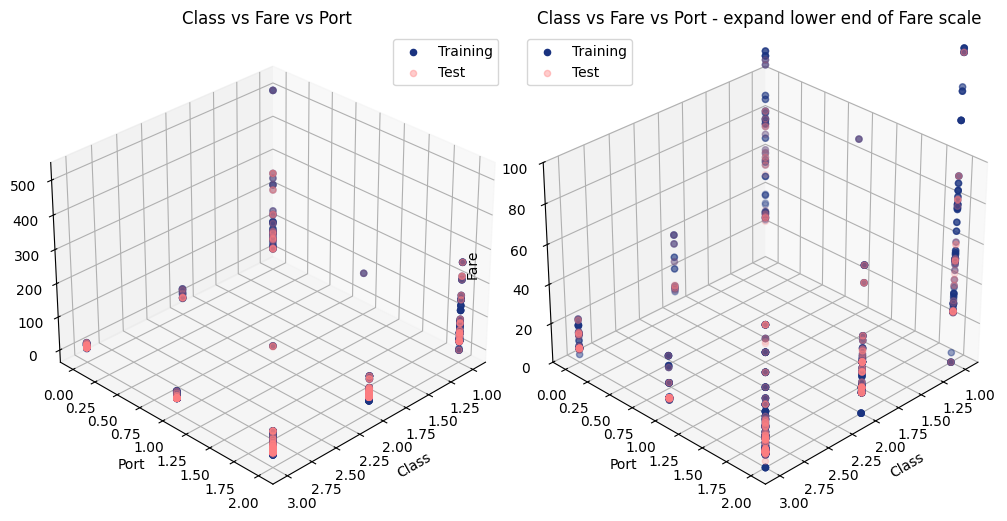

In [615]:
#3D plot - Class vs fare vs Plot
 #  C = 0, Q = 1, S = 2

fig = plt.figure(figsize=(10,30))
ax = fig.add_subplot(2,2,1, projection = "3d")
ax2 = fig.add_subplot(2,2,2, projection = "3d")


ax.scatter(training_data["Pclass"],training_data["Embarked_num"],training_data["Fare"],color = (0.1,0.2,0.5,1))

ax.scatter(test_data["Pclass"],test_data["Embarked_num"],test_data["Fare"],color = (1,0.5,0.5,0.4))
ax.view_init(elev = 30, azim =45, roll = 0)
ax.set_title("Class vs Fare vs Port")
ax.set_xlabel("Class")
ax.set_ylabel("Port")
ax.zaxis.set_rotate_label(False) # disable automatic rotation
ax.set_zlabel("Fare",rotation=90, labelpad=10)
ax.legend(('Training', 'Test'))


ax2.scatter(training_data["Pclass"],training_data["Embarked_num"],training_data["Fare"],color = (0.1,0.2,0.5,1))

ax2.scatter(test_data["Pclass"],test_data["Embarked_num"],test_data["Fare"],color = (1,0.5,0.5,0.4))
ax2.view_init(elev = 30, azim =45, roll = 0)
ax2.set_title("Class vs Fare vs Port - expand lower end of Fare scale")
ax2.set_xlabel("Class")
ax2.set_ylabel("Port")
ax2.set_zlim(0,100)
ax2.zaxis.set_rotate_label(False) # disable automatic rotation
ax2.set_zlabel("Fare",rotation=90, labelpad=10)
ax2.legend(('Training', 'Test'))

plt.tight_layout()

  
  C = 0, Q = 1, S = 2. 1 = Queenstown Ireland less spread in 1st class data, closer to prices for 2nd and 3rd class. Only one female and male adult in first class for training and 1 female test data set as per pivot tables below 



In [616]:
# pivot table including class, age category and port
test_data['farebin'] = pd.cut(test_data["Fare"], [-0.01,0,10,20,30,40,50,60,70,80,90,100,200,300,515])

pvtdf =test_data.pivot_table(index=["Embarked",'Pclass',"Child_Adult"], columns=['farebin'], values=["Fare"], aggfunc=('count')).fillna(0)

pvtdf

C:\Users\USER-1\AppData\Local\Temp\ipykernel_5832\1744270979.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvtdf =test_data.pivot_table(index=["Embarked",'Pclass',"Child_Adult"], columns=['farebin'], values=["Fare"], aggfunc=('count')).fillna(0)


Fare                           \
farebin                      (-0.01, 0.0] (0.0, 10.0] (10.0, 20.0]   
Embarked Pclass Child_Adult                                          
C        1      child female            0           0            0   
                child male              0           0            0   
                female adult            0           0            0   
                male adult              0           0            0   
         2      child female            0           0            0   
                child male              0           0            0   
                female adult            0           0            1   
                male adult              0           0            7   
         3      child female            0           0            1   
                child male              0           0            2   
                female adult            0           4            3   
                male adult              0          18            4   
Q        1      child female            0           0            0   
                child male              0           0            0   
                female adult            0           0            0   
                male adult              0           0            0   
         2      child female            0           0            0   
                child male              0           0            0   
                female adult            0           0            0   
                male adult              0           1            3   
         3      child female            0           0            0   
                child male              0           0            0   
                female adult            0          20            2   
                male adult              0          17            0   
S        1      child female            0           0            0   
                child male              0           0            0   
                female adult            0           0            0   
                male adult              2           0            0   
         2      child female            0           0            1   
                child male              0           0            0   
                female adult            0           0            5   
                male adult              0           0           30   
         3      child female            0           0            3   
                child male              0           2            4   
                female adult            0          18           10   
                male adult              0          73            6   

                                                                     \
farebin                      (20.0, 30.0] (30.0, 40.0] (40.0, 50.0]   
Embarked Pclass Child_Adult                                           
C        1      child female            0            0            0   
                child male              0            0            0   
                female adult            4            1            0   
                male adult              8            0            0   
         2      child female            0            0            1   
                child male              0            0            0   
                female adult            1            1            0   
                male adult              0            0            0   
         3      child female            0            0            0   
                child male              1            0            0   
                female adult            0            0            0   
                male adult              2            0            0   
Q        1      child female            0            0            0   
                child male              0            0            0   
                female adult            0            0            0   
                male adult  

In [617]:
# pivot table including class, age category and port 
training_data['farebin'] = pd.cut(training_data["Fare"], [-0.01,0,10,20,30,40,50,60,70,80,90,100,200,300,515])

pvtdf =training_data.pivot_table(index=["Embarked",'Pclass',"Child_Adult"], columns=['farebin'], values=["Fare"], aggfunc=('count')).fillna(0)

pvtdf

C:\Users\USER-1\AppData\Local\Temp\ipykernel_5832\3840987854.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvtdf =training_data.pivot_table(index=["Embarked",'Pclass',"Child_Adult"], columns=['farebin'], values=["Fare"], aggfunc=('count')).fillna(0)


Fare                           \
farebin                      (-0.01, 0.0] (0.0, 10.0] (10.0, 20.0]   
Embarked Pclass Child_Adult                                          
C        1      child female            0           0            0   
                child male              0           0            0   
                female adult            0           0            0   
                male adult              0           0            0   
         2      child female            0           0            0   
                child male              0           0            0   
                female adult            0           0            3   
                male adult              0           0            4   
         3      child female            0           1            6   
                child male              0           1            4   
                female adult            0           3           11   
                male adult              0          32            5   
Q        1      child female            0           0            0   
                child male              0           0            0   
                female adult            0           0            0   
                male adult              0           0            0   
         2      child female            0           0            0   
                child male              0           0            0   
                female adult            0           0            2   
                male adult              0           0            1   
         3      child female            0           1            0   
                child male              0           0            0   
                female adult            0          25            4   
                male adult              0          28            4   
S        1      child female            0           0            0   
                child male              0           0            0   
                female adult            0           0            0   
                male adult              5           1            0   
         2      child female            0           0            1   
                child male              0           0            3   
                female adult            0           0           29   
                male adult              6           0           55   
         3      child female            0           0            5   
                child male              0           0            4   
                female adult            0          34           17   
                male adult              4         195           21   

                                                                     \
farebin                      (20.0, 30.0] (30.0, 40.0] (40.0, 50.0]   
Embarked Pclass Child_Adult                                           
C        1      child female            0            0            0   
                child male              0            0            0   
                female adult            2            2            2   
                male adult              9            7            2   
         2      child female            0            0            1   
                child male              0            1            0   
                female adult            1            1            1   
                male adult              2            2            1   
         3      child female            1            0            0   
                child male              0            0            0   
                female adult            1            0            0   
                male adult              1            0            0   
Q        1      child female            0            0            0   
                child male              0            0            0   
                female adult            0            0            0   
                male adult  

Who is paying 0 fee - is it justified?

In [618]:
# create fare = 0 dataframe from training
no_fare = training_data.drop(training_data[(training_data["Fare"] != 0)].index)
no_fare.reset_index(inplace=True)

no_fare.T




,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
index,179,263,271,277,302,413,466,481,597,633,674,732,806,815,822
PassengerId,180,264,272,278,303,414,467,482,598,634,675,733,807,816,823
Survived,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Pclass,3,1,3,2,3,2,2,2,3,1,2,2,1,1,1
Name,"Leonard, Mr. Lionel","Harrison, Mr. William","Tornquist, Mr. William Henry","Parkes, Mr. Francis ""Frank""","Johnson, Mr. William Cahoone Jr","Cunningham, Mr. Alfred Fleming","Campbell, Mr. William","Frost, Mr. Anthony Wood ""Archie""","Johnson, Mr. Alfred","Parr, Mr. William Henry Marsh","Watson, Mr. Ennis Hastings","Knight, Mr. Robert J","Andrews, Mr. Thomas Jr","Fry, Mr. Richard","Reuchlin, Jonkheer. John George"
Sex,male,male,male,male,male,male,male,male,male,male,male,male,male,male,male
Age,36.0,40.0,25.0,NaN,19.0,NaN,NaN,NaN,49.0,NaN,NaN,NaN,39.0,NaN,38.0
SibSp,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Parch,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Ticket,LINE,112059,LINE,239853,LINE,239853,239853,239854,LINE,112052,239856,239855,112050,112058,19972


Jonkheer - French lowest rank within the nobility. Source: Wikipedia

All seems to be adult males from Southport, across the classes. May be workers or other link but no common ticket or cabin info. The Captain and others have paid a fare. Make 0 values null and fill with median fare. Could make 3 new columns and find median fare depending on class but not many occurences as percentrage of dataset so will leave at median. 

In [619]:
# create fare = 0 dataframe from test
no_fare = test_data.drop(test_data[(test_data["Fare"] != 0)].index)
no_fare.reset_index(inplace=True)

no_fare.T

,0,1
index,266,372
PassengerId,1158,1264
Pclass,1,1
Name,"Chisholm, Mr. Roderick Robert Crispin","Ismay, Mr. Joseph Bruce"
Sex,male,male
Age,NaN,49.0
SibSp,0,0
Parch,0,0
Ticket,112051,112058
Fare,0.0,0.0


In [620]:
#replace 0 with null 
training_data["Fare"] = training_data["Fare"].replace(0,np.nan)
test_data["Fare"] = test_data["Fare"].replace(0,np.nan)


In [621]:
#check null values
training_data.isnull().sum()

PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                177
SibSp                0
Parch                0
Ticket               0
Fare                15
Cabin              687
Embarked             0
Sex_num              0
Embarked_num         0
Age_fill_med         0
Surname              0
Hons                 0
agebin             177
Child_Adult          0
Child_Adult_num      0
Child_Age          820
Adult_Age          248
Age_fill_alt         0
farebin              0
dtype: int64

In [622]:
#check null values
test_data.isnull().sum()

PassengerId          0
Pclass               0
Name                 0
Sex                  0
Age                 86
SibSp                0
Parch                0
Ticket               0
Fare                 3
Cabin              327
Embarked             0
Sex_num              0
Embarked_num         0
Age_fill_med         0
Surname              0
Hons                 0
agebin              86
Child_Adult          0
Child_Adult_num      0
Child_Age          390
Adult_Age          114
Age_fill_alt         0
farebin              1
dtype: int64

In [623]:
# Filling null values
# replace with mean (not a lot of outliers) or median (lots of outliers)

training_data["Fare"] = training_data["Fare"].fillna(training_data["Fare"].median())

training_data.isnull().sum()

PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                177
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              687
Embarked             0
Sex_num              0
Embarked_num         0
Age_fill_med         0
Surname              0
Hons                 0
agebin             177
Child_Adult          0
Child_Adult_num      0
Child_Age          820
Adult_Age          248
Age_fill_alt         0
farebin              0
dtype: int64

In [624]:
# Filling null values
# replace with mean (not a lot of outliers) or median (lots of outliers)

test_data["Fare"] = test_data["Fare"].fillna(test_data["Fare"].median())

test_data.isnull().sum()

PassengerId          0
Pclass               0
Name                 0
Sex                  0
Age                 86
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              327
Embarked             0
Sex_num              0
Embarked_num         0
Age_fill_med         0
Surname              0
Hons                 0
agebin              86
Child_Adult          0
Child_Adult_num      0
Child_Age          390
Adult_Age          114
Age_fill_alt         0
farebin              1
dtype: int64

In [625]:
# appply quartile bucketing
training_data["Fare_bucket"]=pd.qcut(training_data["Fare"],q=10, labels = False)
training_data.T

,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
PassengerId,1,2,3,4,5,6,7,8,9,10,...,882,883,884,885,886,887,888,889,890,891
Survived,0,1,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,1,0
Pclass,3,1,3,1,3,3,1,3,3,2,...,3,3,2,3,3,2,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry","Moran, Mr. James","McCarthy, Mr. Timothy J","Palsson, Master. Gosta Leonard","Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)","Nasser, Mrs. Nicholas (Adele Achem)",...,"Markun, Mr. Johann","Dahlberg, Miss. Gerda Ulrika","Banfield, Mr. Frederick James","Sutehall, Mr. Henry Jr","Rice, Mrs. William (Margaret Norton)","Montvila, Rev. Juozas","Graham, Miss. Margaret Edith","Johnston, Miss. Catherine Helen ""Carrie""","Behr, Mr. Karl Howell","Dooley, Mr. Patrick"
Sex,male,female,female,female,male,male,male,male,female,female,...,male,female,male,male,female,male,female,female,male,male
Age,22.0,38.0,26.0,35.0,35.0,NaN,54.0,2.0,27.0,14.0,...,33.0,22.0,28.0,25.0,39.0,27.0,19.0,NaN,26.0,32.0
SibSp,1,1,0,1,0,0,0,3,0,1,...,0,0,0,0,0,0,0,1,0,0
Parch,0,0,0,0,0,0,0,1,2,0,...,0,0,0,0,5,0,0,2,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450,330877,17463,349909,347742,237736,...,349257,7552,C.A./SOTON 34068,SOTON/OQ 392076,382652,211536,112053,W./C. 6607,111369,370376
Fare,7.25,71.2833,7.925,53.1,8.05,8.4583,51.8625,21.075,11.1333,30.0708,...,7.8958,10.5167,10.5,7.05,29.125,13.0,30.0,23.45,30.0,7.75


In [626]:
# appply quartile bucketing
test_data["Fare_bucket"]=pd.qcut(test_data["Fare"],q=10, labels = False)
test_data.T

,0,1,2,3,4,5,6,7,8,9,...,408,409,410,411,412,413,414,415,416,417
PassengerId,892,893,894,895,896,897,898,899,900,901,...,1300,1301,1302,1303,1304,1305,1306,1307,1308,1309
Pclass,3,3,2,3,3,3,3,2,3,3,...,3,3,3,1,3,3,1,3,3,3
Name,"Kelly, Mr. James","Wilkes, Mrs. James (Ellen Needs)","Myles, Mr. Thomas Francis","Wirz, Mr. Albert","Hirvonen, Mrs. Alexander (Helga E Lindqvist)","Svensson, Mr. Johan Cervin","Connolly, Miss. Kate","Caldwell, Mr. Albert Francis","Abrahim, Mrs. Joseph (Sophie Halaut Easu)","Davies, Mr. John Samuel",...,"Riordan, Miss. Johanna Hannah""""","Peacock, Miss. Treasteall","Naughton, Miss. Hannah","Minahan, Mrs. William Edward (Lillian E Thorpe)","Henriksson, Miss. Jenny Lovisa","Spector, Mr. Woolf","Oliva y Ocana, Dona. Fermina","Saether, Mr. Simon Sivertsen","Ware, Mr. Frederick","Peter, Master. Michael J"
Sex,male,female,male,male,female,male,female,male,female,male,...,female,female,female,female,female,male,female,male,male,male
Age,34.5,47.0,62.0,27.0,22.0,14.0,30.0,26.0,18.0,21.0,...,NaN,3.0,NaN,37.0,28.0,NaN,39.0,38.5,NaN,NaN
SibSp,0,1,0,0,1,0,0,1,0,2,...,0,1,0,1,0,0,0,0,0,1
Parch,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
Ticket,330911,363272,240276,315154,3101298,7538,330972,248738,2657,A/4 48871,...,334915,SOTON/O.Q. 3101315,365237,19928,347086,A.5. 3236,PC 17758,SOTON/O.Q. 3101262,359309,2668
Fare,7.8292,7.0,9.6875,8.6625,12.2875,9.225,7.6292,29.0,7.2292,24.15,...,7.7208,13.775,7.75,90.0,7.775,8.05,108.9,7.25,8.05,22.3583
Cabin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,C78,NaN,NaN,C105,NaN,NaN,NaN


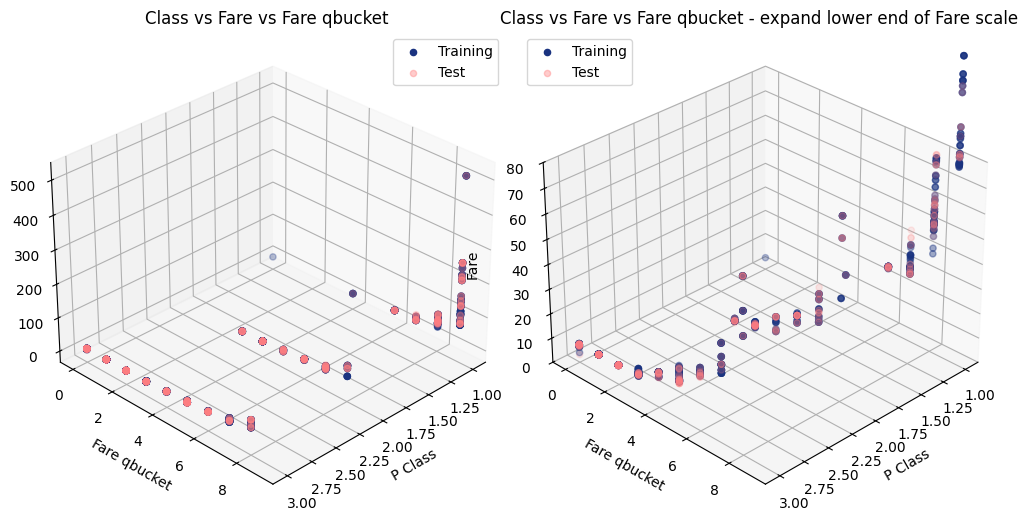

In [627]:
# 3D plot

fig = plt.figure(figsize=(10,30))
ax = fig.add_subplot(2,2,1, projection = "3d")
ax2 = fig.add_subplot(2,2,2, projection = "3d")


ax.scatter(training_data["Pclass"],training_data["Fare_bucket"],training_data["Fare"],color = (0.1,0.2,0.5,1))
ax.scatter(test_data["Pclass"],test_data["Fare_bucket"],test_data["Fare"],color = (1,0.5,0.5,0.4))
ax.view_init(elev = 30, azim =45, roll = 0)
ax.set_title("Class vs Fare vs Fare qbucket")
ax.set_xlabel("P Class")
ax.set_ylabel("Fare qbucket")
ax.zaxis.set_rotate_label(False) # disable automatic rotation
ax.set_zlabel("Fare",rotation=90, labelpad=10)
ax.legend(('Training', 'Test'))

ax2.scatter(training_data["Pclass"],training_data["Fare_bucket"],training_data["Fare"],color = (0.1,0.2,0.5,1))
ax2.scatter(test_data["Pclass"],test_data["Fare_bucket"],test_data["Fare"],color = (1,0.5,0.5,0.4))
ax2.view_init(elev = 30, azim =45, roll = 0)
ax2.set_title("Class vs Fare vs Fare qbucket - expand lower end of Fare scale")
ax2.set_xlabel("P Class")
ax2.set_ylabel("Fare qbucket")
ax2.set_zlim(0,80)
ax2.zaxis.set_rotate_label(False) # disable automatic rotation
ax2.set_zlabel("Fare",rotation=90, labelpad=10)
ax2.legend(('Training', 'Test'))

plt.tight_layout()

This bucketing level seems to give fair distinction betweem classes. Some unique groups in 1st and 3rd

# 2.6 Data Cleaning Reviewing and Correlation checks

Blue is training data and red is test data


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

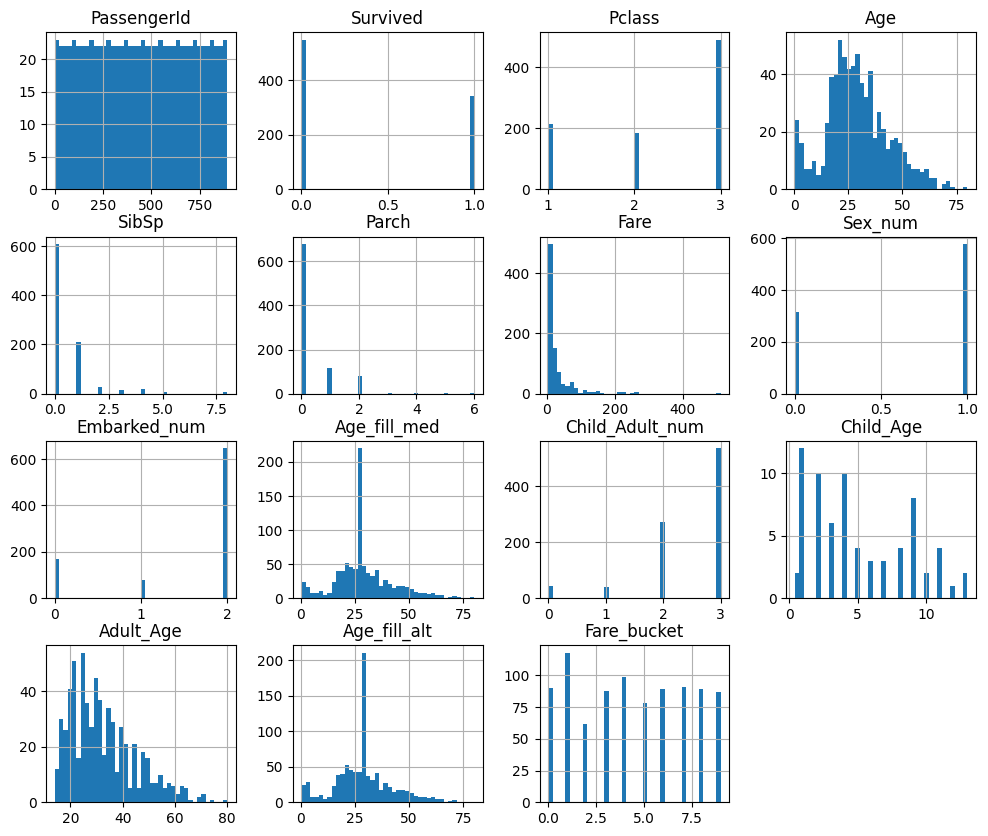

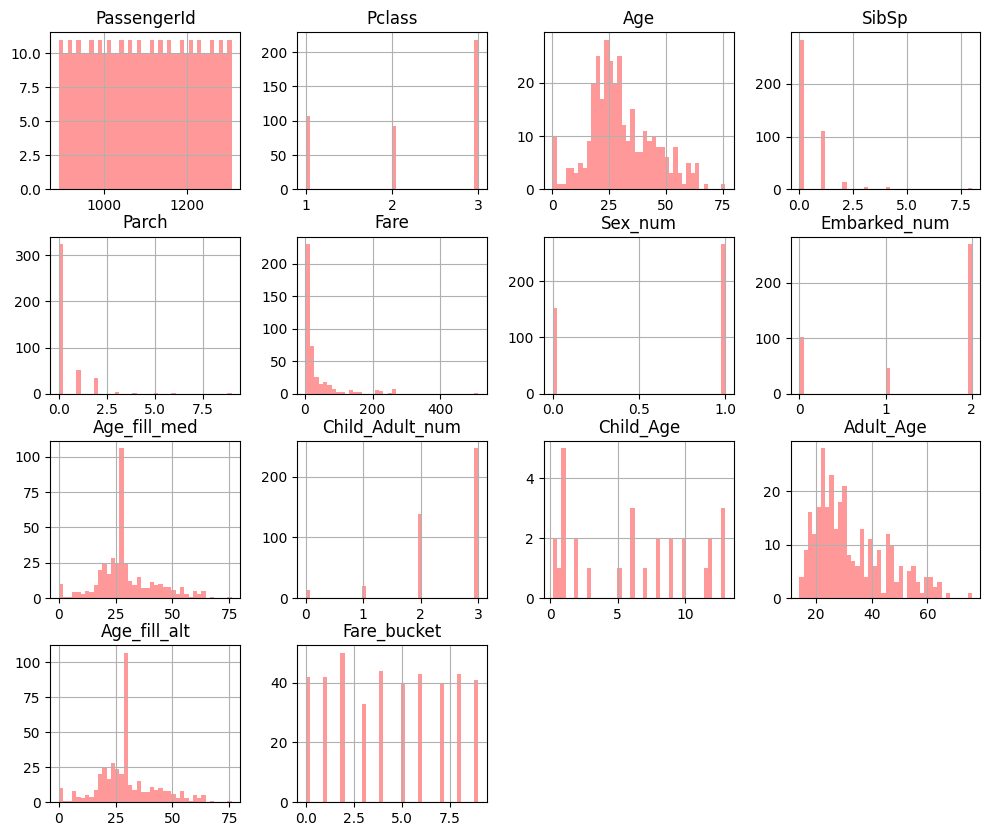

In [ ]:
# Visualise distibution of features now have added more
# histogram all numeric data to check data skews at a glance

print("Blue is training data and red is test data")

training_data.hist(bins=40, figsize=(12,10))
#plt.title("Training")
plt.tight_layout
test_data.hist(bins=40, figsize=(12,10),color = (1,0.5,0.5,0.8))
#plt.title("Test")
plt.tight_layout

A lot of imbalanced, skewed data

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

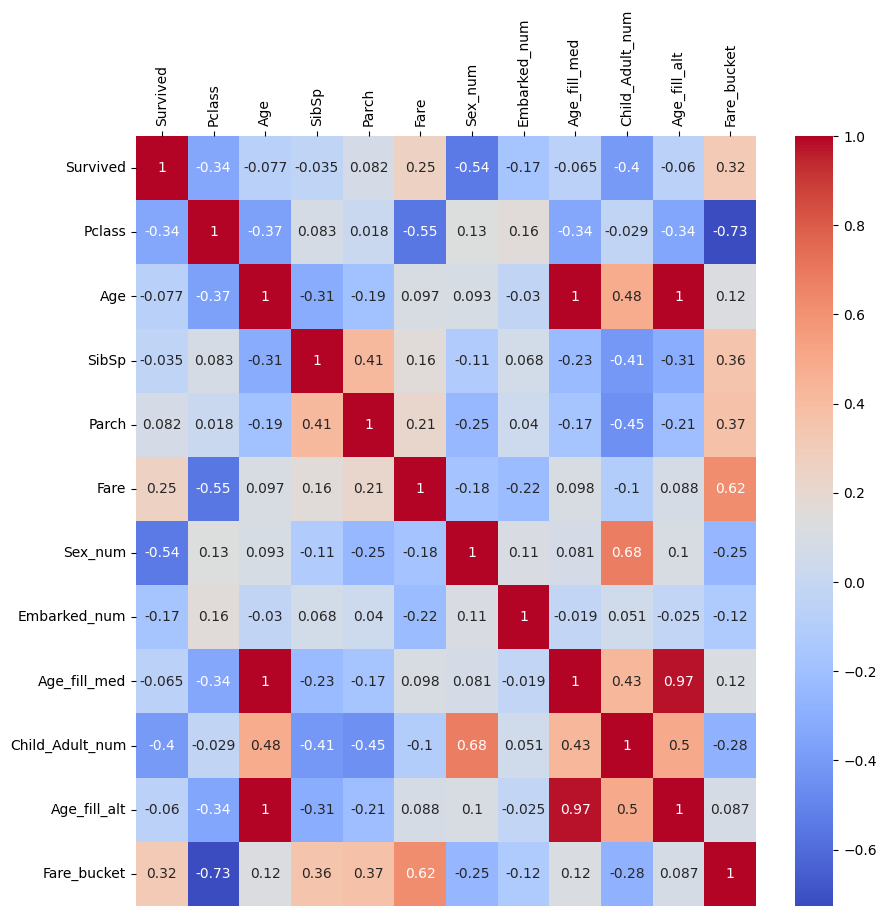

In [629]:
# correlation matrix
plt.figure(figsize=(10,10))
corr_matrix = training_data[["Survived","Pclass","Age","SibSp","Parch","Fare","Sex_num","Embarked_num","Age_fill_med","Child_Adult_num","Age_fill_alt","Fare_bucket"]].corr()
ax = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
ax.xaxis.tick_top()
plt.xticks(rotation=90)
plt.tight_layout

<Figure size 1500x1500 with 0 Axes>

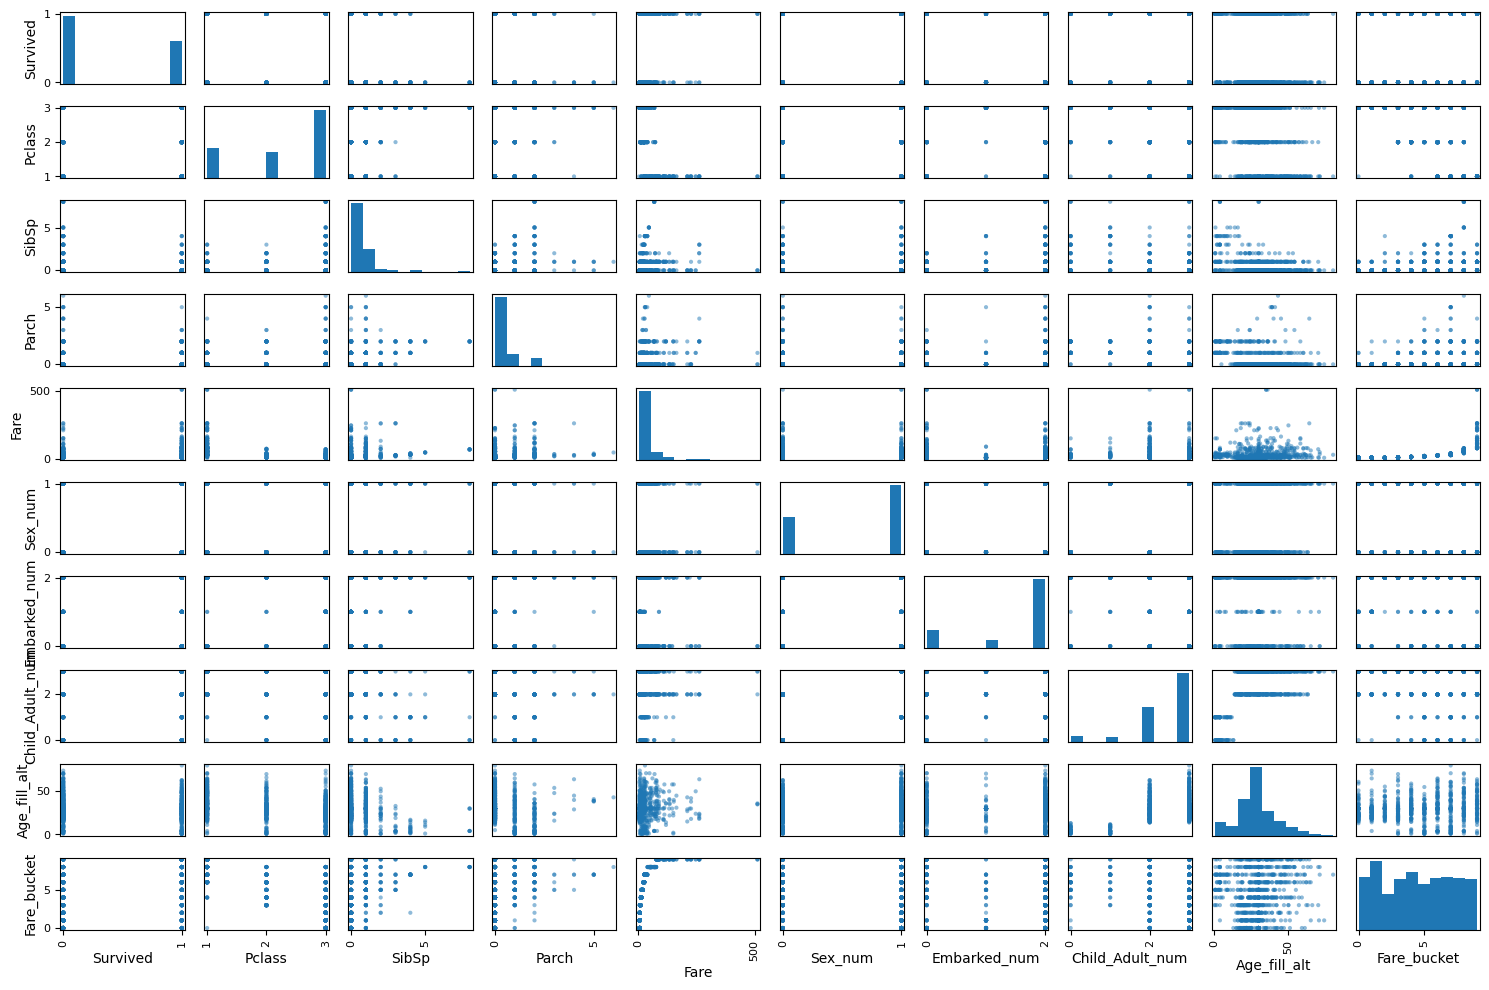

In [630]:
# Generate scatter matrix comparable to correlation matrix 
# visualise the data relationships and the correlation numbers if presented beside each other (with only one age category)
plt.figure(figsize=(15,15))

attributes = ["Survived","Pclass","SibSp","Parch","Fare","Sex_num","Embarked_num","Child_Adult_num","Age_fill_alt","Fare_bucket"]
scatter_matrix(training_data[attributes], figsize=(15,10))

plt.tight_layout()

- P class 0.34 correlation - use
- Sex_num strong -0.54 correlation.  Child_adult_num slightly lower -0.4 but uses most of Sex_num info + adult and child categories and higher correlation to sibsp and parch - Use Child_adult_true intially
- Fare ok correlation alone 0.25, slightly higher bucketed at 0.32 - use Fare bucket. Fare_bucket strong correlation (and stronger than Fare alone) to SibSp, Patch
- Embarked number lower correl -0.2 but no major correlation to other features 
- Age and filled age categories low correlation 0.06/0.7. If use, pick Age_fill_alt based on child and adult filled numbers
- SibSP and Parch very low correlation Less than +/- 0.1 -

# 3 Modelling
# 3.1 Model prep


In [631]:

# selecting the dependent and independent variable. 
# Previous file with more of lower correlated features didn't show much difference with added features 
# To compare model swent with 3 most correlated with newly created features that correlate well to other features not used directly
x = training_data[["Pclass","Child_Adult_num","Fare_bucket"]]
y = training_data["Survived"]

In [632]:
# view data
print(y)
x

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


,Pclass,Child_Adult_num,Fare_bucket
0,3,3,0
1,1,2,8
2,3,2,2
3,1,2,8
4,3,3,2
...,...,...,...
886,2,3,4
887,1,2,7
888,3,0,6
889,1,3,7


In [633]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=32)

# View X_train
print(y_train)
X_train


293    0
617    0
424    0
888    0
230    1
      ..
403    0
88     1
310    1
555    0
727    1
Name: Survived, Length: 712, dtype: int64


,Pclass,Child_Adult_num,Fare_bucket
293,3,2,3
617,3,2,5
424,3,3,5
888,3,0,6
230,1,2,9
...,...,...,...
403,3,3,5
88,1,2,9
310,1,2,9
555,1,3,6


In [634]:
# Scale data
# robust scalar (extreme outliers, uses median instead of mean as per standard scaler)

r = RobustScaler()
X_train_r = r.fit_transform(X_train)
X_test_r = r.transform(X_test)

X_train_r

array([[ 0. , -1. , -0.2],
       [ 0. , -1. ,  0.2],
       [ 0. ,  0. ,  0.2],
       ...,
       [-2. , -1. ,  1. ],
       [-2. ,  0. ,  0.4],
       [ 0. , -1. , -0.8]])

In [635]:
X_test_r

array([[ 0. ,  0. , -0.4],
       [-2. , -1. ,  1. ],
       [-2. , -1. ,  1. ],
       [ 0. ,  0. , -0.8],
       [-1. ,  0. ,  0. ],
       [-2. , -1. ,  0.8],
       [ 0. ,  0. ,  0.8],
       [ 0. ,  0. , -0.2],
       [ 0. ,  0. , -0.6],
       [-1. ,  0. ,  0.6],
       [ 0. ,  0. , -0.6],
       [-2. , -1. ,  0.6],
       [-1. ,  0. ,  0. ],
       [-2. ,  0. ,  0.8],
       [-2. , -1. ,  1. ],
       [ 0. ,  0. , -0.6],
       [-1. ,  0. , -0.2],
       [ 0. ,  0. , -0.6],
       [-2. ,  0. ,  1. ],
       [ 0. , -1. ,  0.4],
       [-1. ,  0. ,  0. ],
       [-1. , -1. ,  0. ],
       [ 0. , -1. ,  0.6],
       [ 0. ,  0. , -0.2],
       [ 0. ,  0. ,  0.6],
       [-2. ,  0. ,  0.8],
       [ 0. , -1. ,  0.6],
       [ 0. ,  0. ,  0. ],
       [-1. , -1. ,  0. ],
       [ 0. , -1. , -0.2],
       [ 0. ,  0. , -0.2],
       [-2. , -1. ,  1. ],
       [-2. ,  0. ,  1. ],
       [ 0. , -1. , -0.8],
       [-1. , -1. ,  0.2],
       [ 0. ,  0. , -0.8],
       [-1. , -3. ,  0.4],
 

# 3.2 Logistic Regression

In [636]:
# logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train_r,y_train)

LogisticRegression()

In [637]:
# make prediction
y_pred_log = log_reg.predict(X_test_r)
y_pred_log

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1])

In [638]:
# put in dataframe
Pred_results = pd.DataFrame({"Actual_survived":y_test,"Pred_survived":y_pred_log})
Pred_results

,Actual_survived,Pred_survived
837,0,0
334,1,1
849,1,1
778,0,0
413,0,0
...,...,...
74,1,0
700,1,1
770,0,0
559,1,0


In [639]:
Pred_results["Pred_survived"].value_counts()

Pred_survived
0    123
1     56
Name: count, dtype: int64

In [640]:
#Correct results
Pred_results["Actual_survived"].value_counts()

Actual_survived
0    108
1     71
Name: count, dtype: int64

In [641]:
# model evaluation - accuracy score not standard metric
metrics.accuracy_score(y_test, y_pred_log)

0.770949720670391

In [642]:
# confusion matrix - classify/evaluate model prediction
c = confusion_matrix(y_test,y_pred_log)
c

array([[95, 13],
       [28, 43]])

In [643]:
#normed_c = (confusion_matrix.T / confusion_matrix.astype(np.float).sum(axis=1)).T

normed_c = c / np.sum(c, axis=1, keepdims=True)
normed_c


# import scikitplot as skplt 
# skplt.metrics.plot_confusion_matrix(Y_TRUE, Y_PRED, normalize=True)

array([[0.87962963, 0.12037037],
       [0.3943662 , 0.6056338 ]])

- 88% of the time will predict person died correctly
- 39.4 % of the time will predict person died when they survived
- 12.8% of time will predict someone lived when they died
- 60.5% of the time will predict person survived correctly

# 3.3 KNN


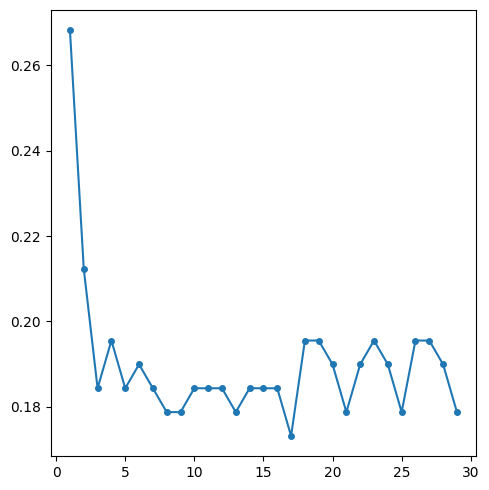

In [644]:
# getting our k value
# domain knowledge or k = square root of our samples (training data  712 - square root = 27) or visualise error rate at each k level 

# visualise error rate at each k level 
error_rate = []

# k can't be higher than number of samples
for i in range (1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_r,y_train)
    knn_pred = knn.predict(X_test_r)
    error_rate.append(np.mean(knn_pred != y_test))

#plotting error rate against the i
plt.figure(figsize=(5,5))
plt.plot(range(1,30),error_rate, marker = "o", markersize = 4)
plt.tight_layout()

# 3.3.1 k = 9

In [645]:
# building my knn model
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_r, y_train)

KNeighborsClassifier(n_neighbors=9)

In [646]:
# Make prediction
y_pred_knn = knn.predict(X_test_r)

In [647]:
# measure accuracy
metrics.accuracy_score(y_test,y_pred_knn)

0.8212290502793296

In [648]:
c_knn = confusion_matrix(y_test,y_pred_knn)
normed_c_knn= c_knn / np.sum(c_knn, axis=1, keepdims=True)
normed_c_knn

array([[0.93518519, 0.06481481],
       [0.35211268, 0.64788732]])

# 3.3.2 k = 3

In [649]:
# building my knn model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_r, y_train)

KNeighborsClassifier(n_neighbors=3)

In [650]:
# Make prediction
y_pred_knn = knn.predict(X_test_r)

In [651]:
# measure accuracy
metrics.accuracy_score(y_test,y_pred_knn)

0.8156424581005587

In [652]:
c_knn = confusion_matrix(y_test,y_pred_knn)
normed_c_knn= c_knn / np.sum(c_knn, axis=1, keepdims=True)
normed_c_knn

array([[0.87037037, 0.12962963],
       [0.26760563, 0.73239437]])

# 3.3.3 k = 17

In [653]:
# building my knn model
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train_r, y_train)

KNeighborsClassifier(n_neighbors=17)

In [654]:
# Make prediction
y_pred_knn = knn.predict(X_test_r)
# measure accuracy
metrics.accuracy_score(y_test,y_pred_knn)

0.8268156424581006

In [655]:
c_knn = confusion_matrix(y_test,y_pred_knn)
normed_c_knn= c_knn / np.sum(c_knn, axis=1, keepdims=True)
normed_c_knn

array([[0.93518519, 0.06481481],
       [0.33802817, 0.66197183]])

# 3.4 SVM

In [656]:
# svm (clf = classifier)
clflinear = svm.SVC(kernel="linear")
clfsigmoid = svm.SVC(kernel="sigmoid")
clfrbf = svm.SVC(kernel = "rbf")

In [657]:
# train the model
clflinear.fit(X_train_r,y_train)
clfsigmoid.fit(X_train_r,y_train)
clfrbf.fit(X_train_r,y_train)

SVC()

In [658]:
# predicting
y_pred_linear = clflinear.predict(X_test_r)
y_pred_sigmoid = clfsigmoid.predict(X_test_r)
y_pred_rbf = clfrbf.predict(X_test_r)

In [659]:
# calculate accuracy
print("Accuracy linear kernel: ", metrics.accuracy_score(y_test,y_pred_linear))
print("Accuracy sigmoid: ", metrics.accuracy_score(y_test,y_pred_sigmoid))
print("Accuracy rbf: ", metrics.accuracy_score(y_test,y_pred_rbf))

# data is linearly seperable

Accuracy linear kernel:  0.8212290502793296
Accuracy sigmoid:  0.5083798882681564
Accuracy rbf:  0.7988826815642458


In [660]:
c_linear = confusion_matrix(y_test,y_pred_linear)
normed_c = c_linear / np.sum(c_linear, axis=1, keepdims=True)
normed_c

array([[0.90740741, 0.09259259],
       [0.30985915, 0.69014085]])

In [661]:
c_sigmoid = confusion_matrix(y_test,y_pred_sigmoid)
normed_c = c_sigmoid / np.sum(c_sigmoid, axis=1, keepdims=True)
normed_c

array([[0.61111111, 0.38888889],
       [0.64788732, 0.35211268]])

In [662]:
c_rbf =  confusion_matrix(y_test,y_pred_rbf)
normed_c = c_rbf / np.sum(c_rbf, axis=1, keepdims=True)
normed_c

array([[0.90740741, 0.09259259],
       [0.36619718, 0.63380282]])

# 3.5 Decision Tree


In [663]:
# creating a decision tree classifier
# building 3 forms (default - no specifciations, entropy, maximum depth specfied)

# could add random_state within model if answer changed on re-running (currently doesn't)
# by default has a gini classifier 
decision_tree_gini = DecisionTreeClassifier()

# using entropy criterion - use for imbalanced
decision_tree_ent = DecisionTreeClassifier(criterion="entropy")

# use a max depth, gini with a max depth 
decision_tree_depth = DecisionTreeClassifier(max_depth=3)

In [664]:
# fit the trees
decision_tree_model_gini = decision_tree_gini.fit(X_train_r,y_train)
decision_tree_model_ent = decision_tree_ent.fit(X_train_r,y_train)
decision_tree_model_depth = decision_tree_depth.fit(X_train_r,y_train)

In [665]:
# predict
y_pred_gini = decision_tree_model_gini.predict(X_test_r)
y_pred_ent = decision_tree_model_ent.predict(X_test_r)
y_pred_depth = decision_tree_model_depth.predict(X_test_r)

In [666]:
print("Accuracy gini: ", metrics.accuracy_score(y_test,y_pred_gini))
print("Accuracy ent: ", metrics.accuracy_score(y_test,y_pred_ent))
print("Accuracy depth: ", metrics.accuracy_score(y_test,y_pred_depth))

Accuracy gini:  0.8212290502793296
Accuracy ent:  0.8212290502793296
Accuracy depth:  0.8100558659217877


In [667]:
c_gini = confusion_matrix(y_test,y_pred_gini)
normed_c_gini = c_gini / np.sum(c_gini, axis=1, keepdims=True)
normed_c_gini

array([[0.93518519, 0.06481481],
       [0.35211268, 0.64788732]])

In [668]:
c_ent = confusion_matrix(y_test,y_pred_ent)
normed_c_ent= c_ent / np.sum(c_ent, axis=1, keepdims=True)
normed_c_ent

array([[0.93518519, 0.06481481],
       [0.35211268, 0.64788732]])

In [669]:
c_depth = confusion_matrix(y_test,y_pred_depth)
normed_c_depth = c_depth / np.sum(c_depth, axis=1, keepdims=True)
normed_c_depth

array([[0.89814815, 0.10185185],
       [0.32394366, 0.67605634]])

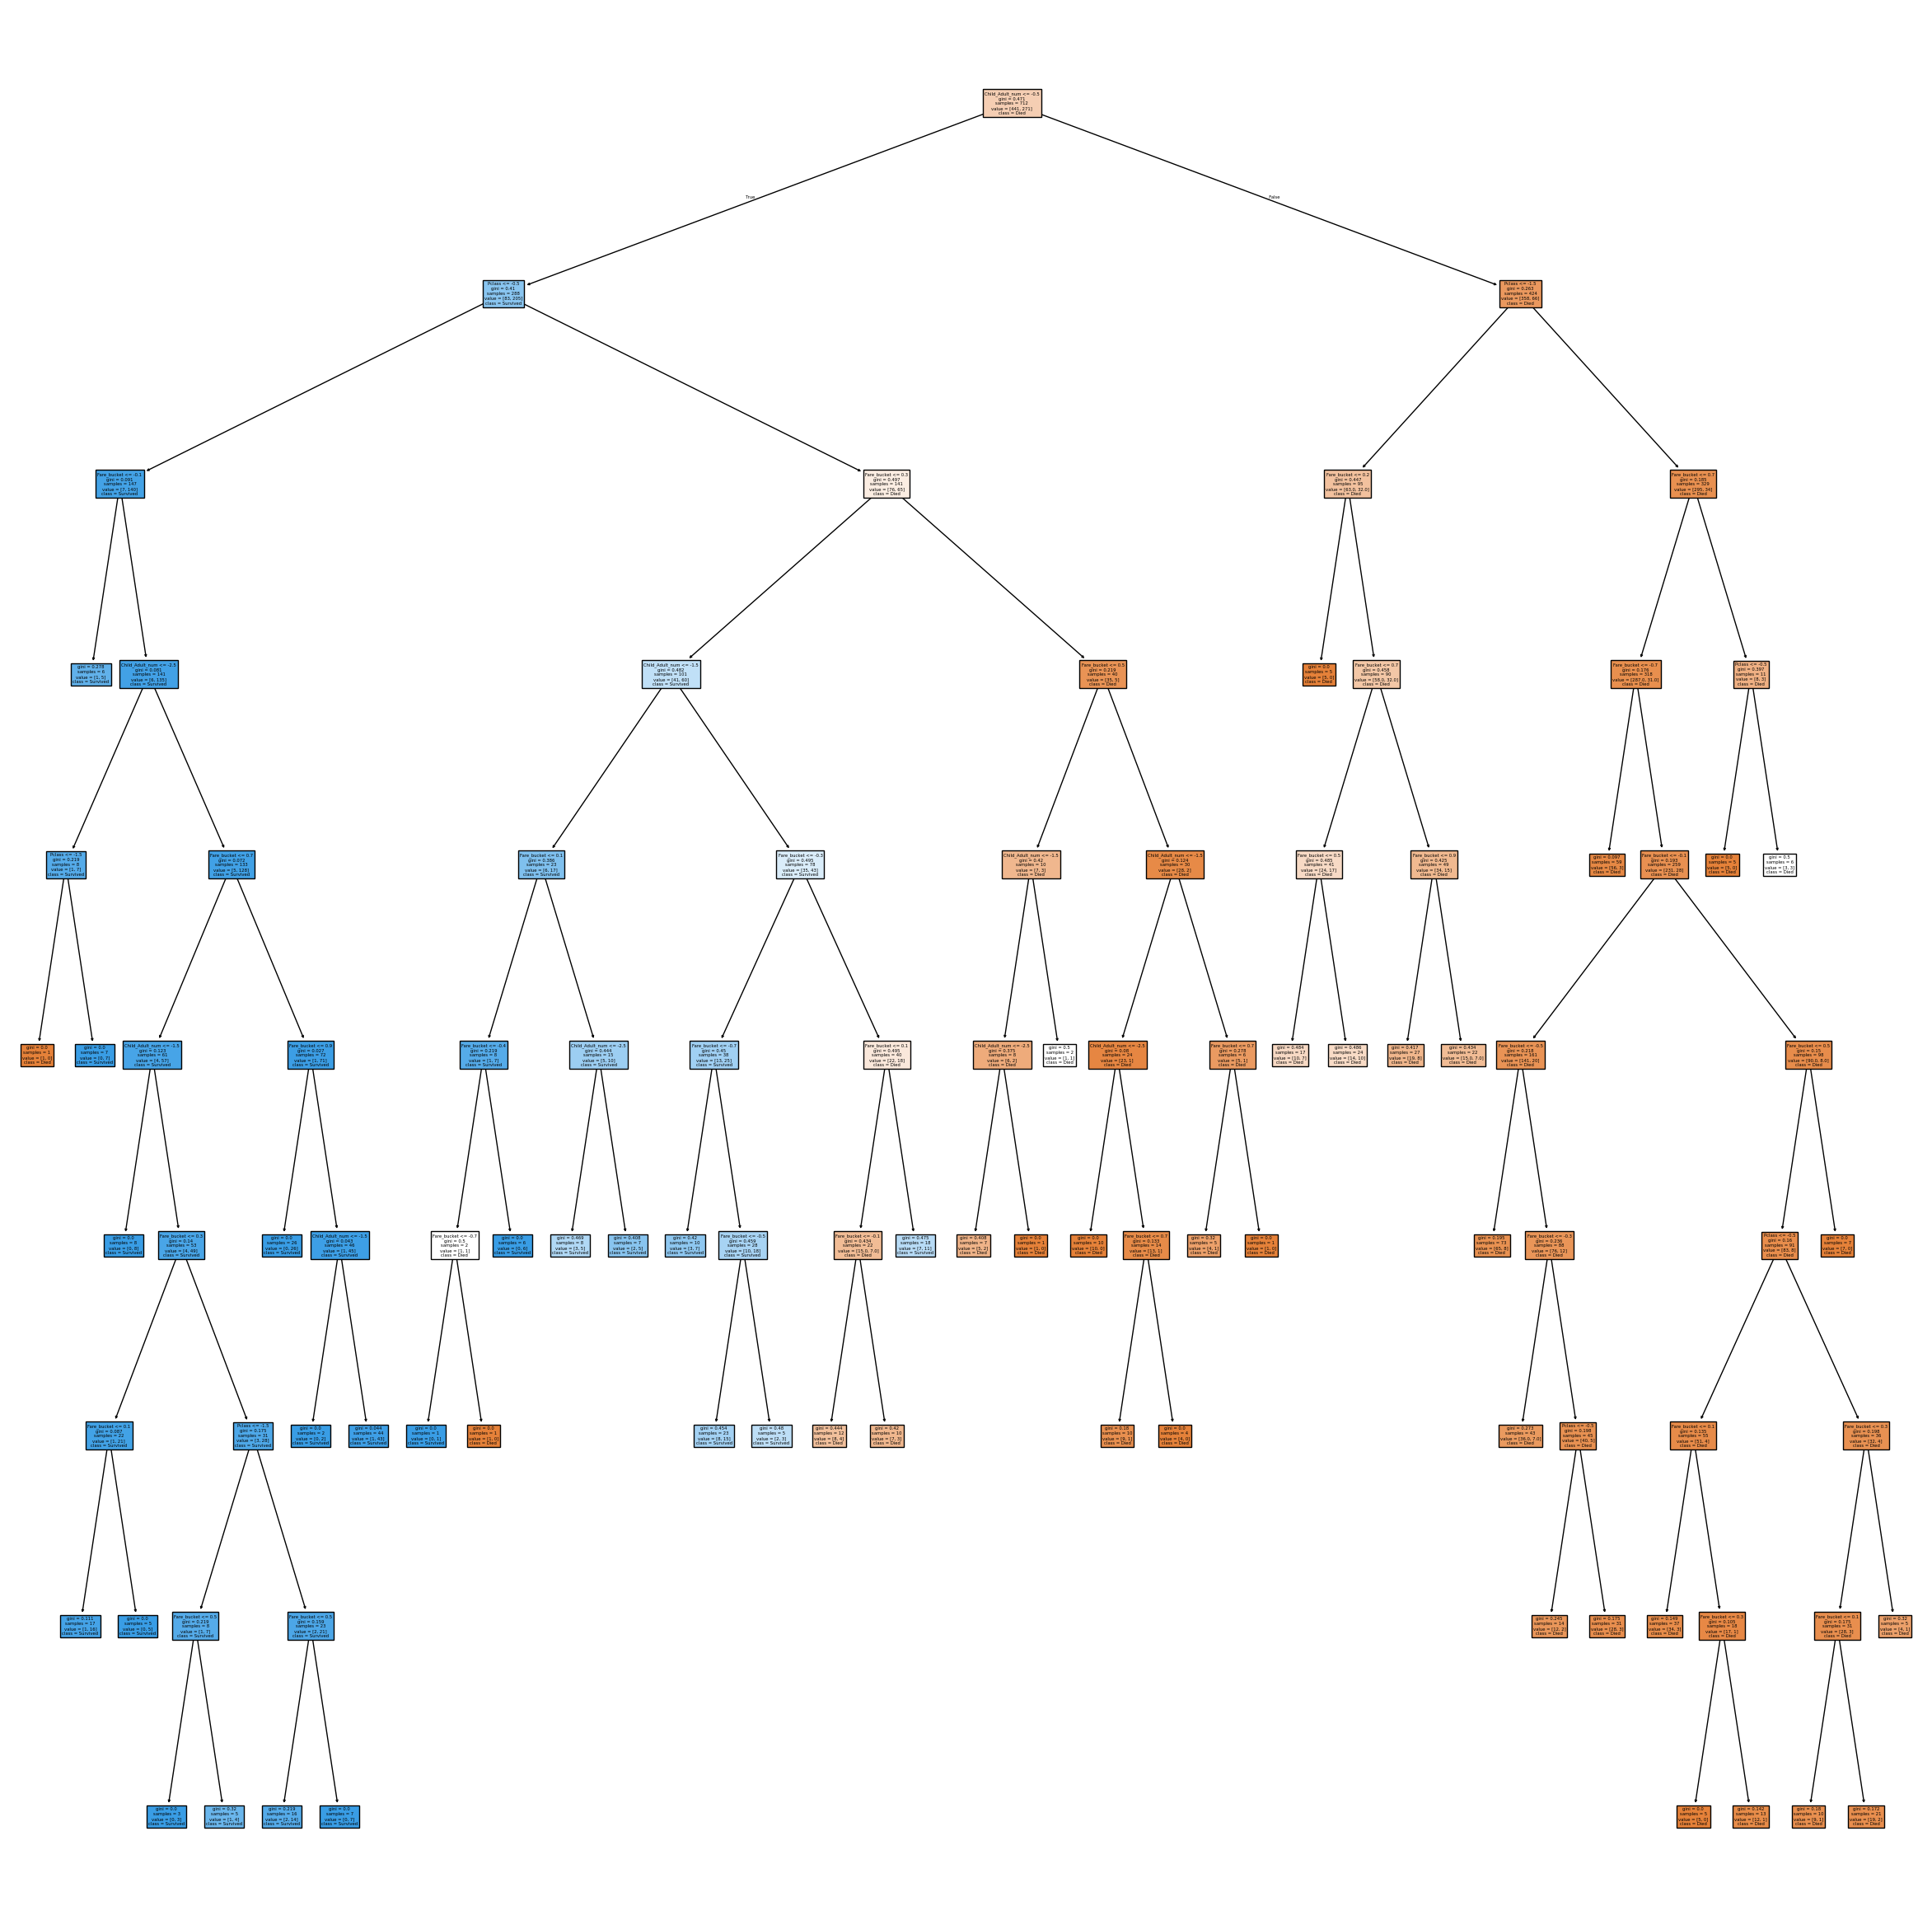

In [670]:
# Visualizing the decision tree
plt.figure(figsize=(30,30))
# plot_tree(model, filled, )
plot_tree(decision_tree_gini, filled=True, feature_names= ["Pclass","Child_Adult_num","Fare_bucket"], class_names=["Died","Survived"])
#plot_tree(decision_tree_gini, filled=True, feature_names= ["mass","width","height","color_score"])
plt.show()

# 3.5.1 Less Features for a more reasonable Tree Diagram
Not scaled for comparison

In [671]:
# selecting the dependent and independent variable.
x = training_data[["Pclass","Child_Adult_num"]]
y = training_data["Survived"]

In [672]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=32)

# View X_train
print(y_train)
X_train

293    0
617    0
424    0
888    0
230    1
      ..
403    0
88     1
310    1
555    0
727    1
Name: Survived, Length: 712, dtype: int64


,Pclass,Child_Adult_num
293,3,2
617,3,2
424,3,3
888,3,0
230,1,2
...,...,...
403,3,3
88,1,2
310,1,2
555,1,3


In [673]:
# fit the trees
decision_tree_model_gini = decision_tree_gini.fit(X_train,y_train)
decision_tree_model_ent = decision_tree_ent.fit(X_train,y_train)
decision_tree_model_depth = decision_tree_depth.fit(X_train,y_train)

In [674]:
# predict
y_pred_gini = decision_tree_model_gini.predict(X_test)
y_pred_ent = decision_tree_model_ent.predict(X_test)
y_pred_depth = decision_tree_model_depth.predict(X_test)

In [675]:
print("Accuracy gini: ", metrics.accuracy_score(y_test,y_pred_gini))
print("Accuracy ent: ", metrics.accuracy_score(y_test,y_pred_ent))
print("Accuracy depth: ", metrics.accuracy_score(y_test,y_pred_depth))

Accuracy gini:  0.7932960893854749
Accuracy ent:  0.7932960893854749
Accuracy depth:  0.7932960893854749


In [676]:
c_gini = confusion_matrix(y_test,y_pred_gini)
normed_c_gini = c_gini / np.sum(c_gini, axis=1, keepdims=True)
normed_c_gini

array([[0.87962963, 0.12037037],
       [0.33802817, 0.66197183]])

In [677]:
c_ent = confusion_matrix(y_test,y_pred_ent)
normed_c_ent= c_ent / np.sum(c_ent, axis=1, keepdims=True)
normed_c_ent

array([[0.87962963, 0.12037037],
       [0.33802817, 0.66197183]])

In [678]:
c_depth = confusion_matrix(y_test,y_pred_depth)
normed_c_depth = c_depth / np.sum(c_depth, axis=1, keepdims=True)
normed_c_depth

array([[0.87962963, 0.12037037],
       [0.33802817, 0.66197183]])

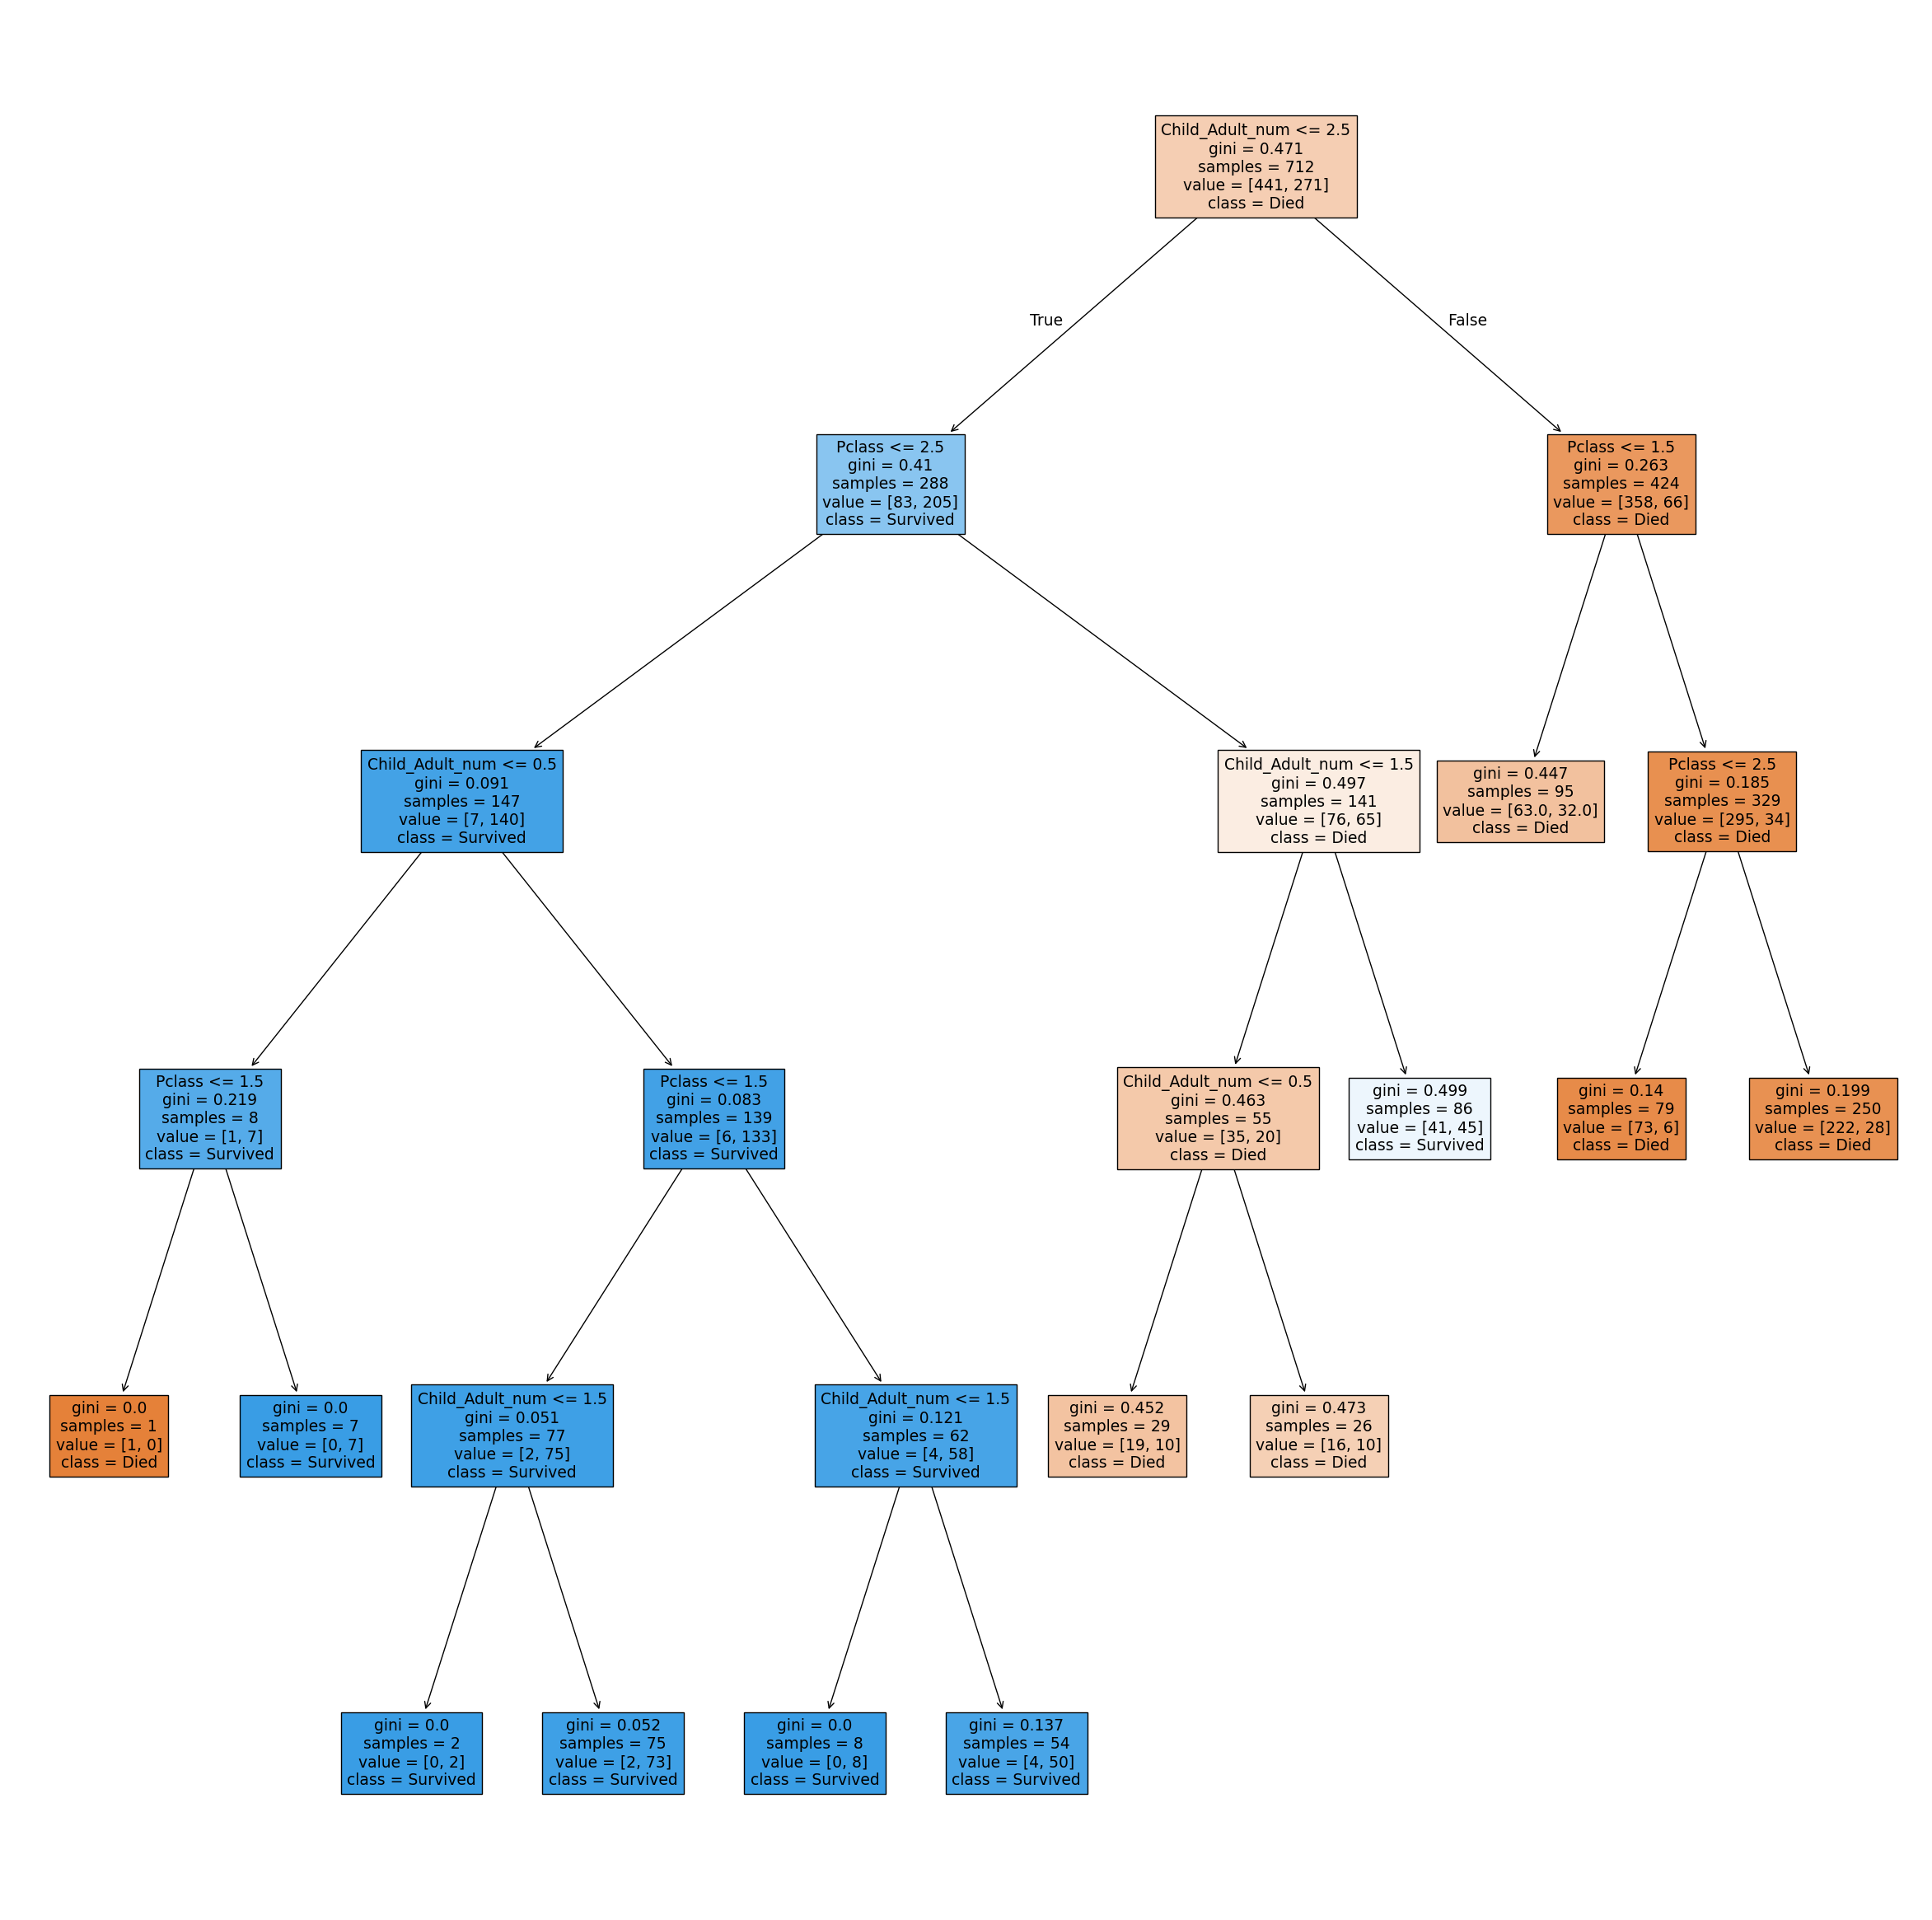

In [679]:
# Visualizing the decision tree
plt.figure(figsize=(30,30))
# plot_tree(model, filled, )
plot_tree(decision_tree_gini, filled=True, feature_names= ["Pclass","Child_Adult_num","Fare_bucket"], class_names=["Died","Survived"])
#plot_tree(decision_tree_gini, filled=True, feature_names= ["mass","width","height","color_score"])
plt.show()

# 3.6 Naive Bayes


In [680]:
# use categorical data
# selecting the dependent and independent variable.
x = training_data[["Pclass","Child_Adult_num","Fare_bucket"]]
y = training_data["Survived"]


In [681]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=32)

In [682]:
# No scaling as Multinomial didn't like negative values

In [683]:
# create our naive bayes models
clf_Gauss = GaussianNB()
clf_mlti = MultinomialNB()
clf_Brn = BernoulliNB()

clf_Gauss.fit(X_train,y_train)
clf_mlti.fit(X_train,y_train)
clf_Brn.fit(X_train,y_train)


BernoulliNB()

In [684]:
# predict
y_pred_Gauss = clf_Gauss.predict(X_test)
y_pred_mlti = clf_mlti.predict(X_test)
y_pred_Brn = clf_Brn.predict(X_test)

In [685]:
print("Accuracy Gauss: ", metrics.accuracy_score(y_test,y_pred_Gauss))
print("Accuracy mlti: ", metrics.accuracy_score(y_test,y_pred_mlti))
print("Accuracy Brn: ", metrics.accuracy_score(y_test,y_pred_Brn))

Accuracy Gauss:  0.7318435754189944
Accuracy mlti:  0.6871508379888268
Accuracy Brn:  0.6033519553072626


In [686]:
c_gauss = confusion_matrix(y_test,y_pred_Gauss)
normed_c = c_gauss / np.sum(c_gauss, axis=1, keepdims=True)
normed_c

array([[0.83333333, 0.16666667],
       [0.42253521, 0.57746479]])

In [687]:
c_gauss

array([[90, 18],
       [30, 41]])

In [688]:
c_mlti = confusion_matrix(y_test,y_pred_mlti)
normed_c = c_mlti / np.sum(c_mlti, axis=1, keepdims=True)
normed_c

array([[0.77777778, 0.22222222],
       [0.45070423, 0.54929577]])

In [689]:
c_mlti

array([[84, 24],
       [32, 39]])

In [690]:
c_brn = confusion_matrix(y_test,y_pred_Brn)
normed_c = c_brn / np.sum(c_brn, axis=1, keepdims=True)
normed_c

array([[1., 0.],
       [1., 0.]])

In [691]:
c_brn

array([[108,   0],
       [ 71,   0]])

# 4 Conclusions
- New features Adult/Child and Fare quartile bin generated and used for modelling
    - stronger correlations than original Sex and Fare data to familial relationships and age, so indirectly incorporated these
- A simple unoptimised decision Tree predicts that all adult males die, all adult females live, all 3rd class children die
- Due to imbalanced dataset models not as good at predicting those that survived
    - 60 % accuracy BeronulliNB couldn’t predict anyone living
- Models 80+/-3% accuracy except Naive Bayes (NB) and Sigmoid SVM
- Comparable confusion matrix for most except:
    - Sigmoid SVM and Bernoulli NB, which performed worst of all models
    - K = 3 KNN model gives better prediction of survivors

